In [383]:
# need to clean data first
import pandas as pd
import numpy as np
import datetime as dt
import geopandas
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

print("Complete")

Complete


In [ ]:
# reading and cleaning dataset
df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv",low_memory = False)
df = df.dropna(subset=['PD_DESC','OFNS_DESC'])
#convert ARREST_DATE column to a datetime type
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
#removed rows with latitude greater than 41 because outside of new york city boroughs
df = df.loc[df['Latitude']<41]

df_years={}
for i in range(2006,2021):
    df_years[i] = df[df['ARREST_DATE'].dt.year == i]
print("Complete")

In [ ]:
df_2007 = df_years[2007]
#for year in df_years:
    #print(df_years[year].head())
unique_ofns = df_2007['OFNS_DESC'].unique()

In [ ]:
#visualize where the concentration of certain crimes are in NYC
for ofns in unique_ofns:
    boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))
    fig,ax = plt.subplots(figsize=(8,6),dpi=100)
    boros.to_crs("EPSG:4326").plot(color="lightgrey",ax=ax)
    df_ofns = df_2007[df_2007['OFNS_DESC']==ofns]
    x = df_ofns['Latitude'].tolist()
    y =  df_ofns['Longitude'].tolist()
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(y, x, c=z, s=100)
    plt.title(ofns)
    #df_2007.plot(x="Longitude", y="Latitude", kind="scatter",colormap="YlOrRd",ax=ax)
    plt.show()

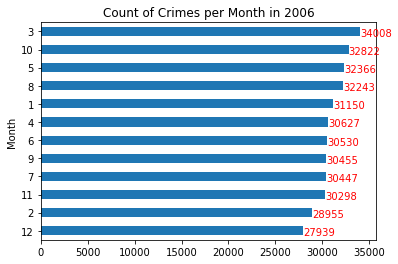

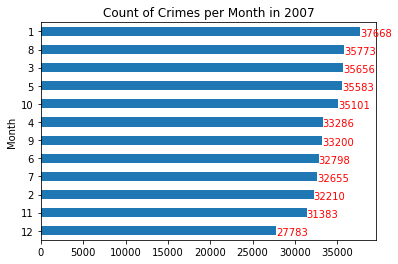

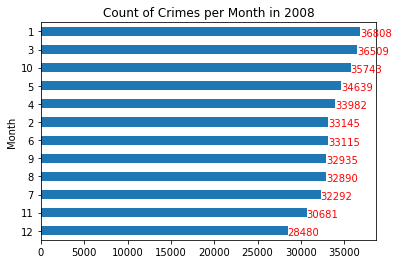

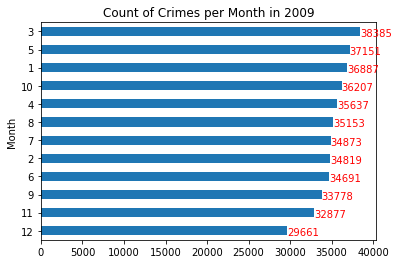

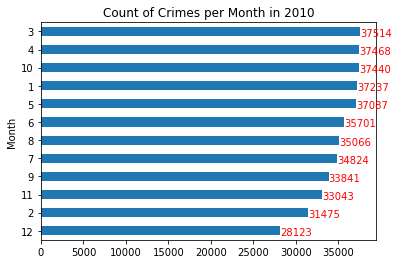

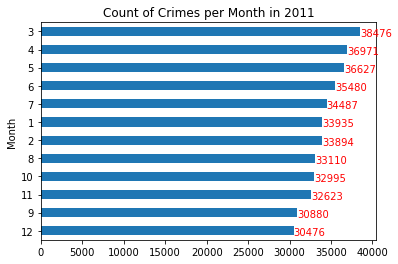

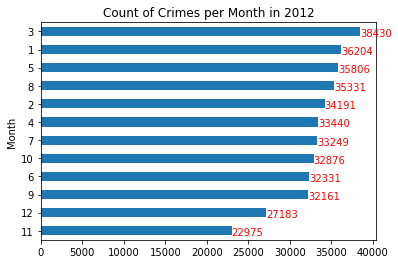

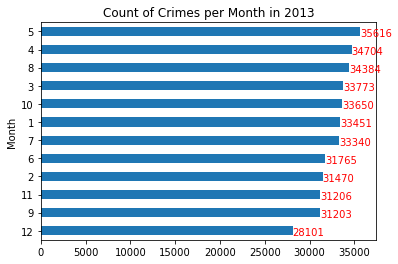

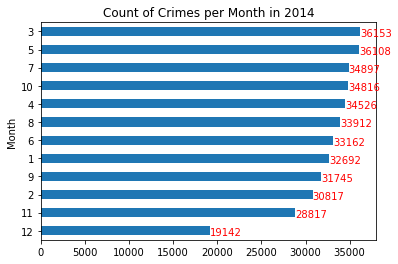

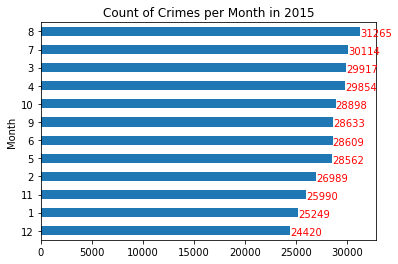

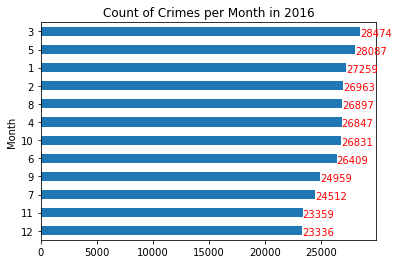

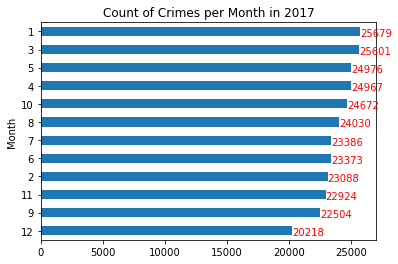

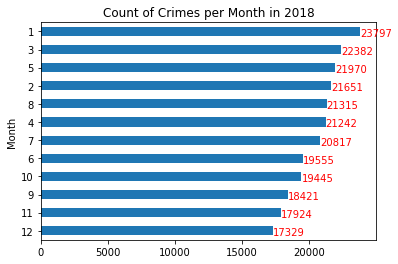

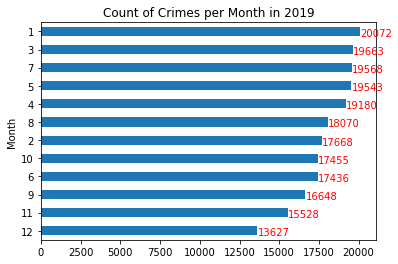

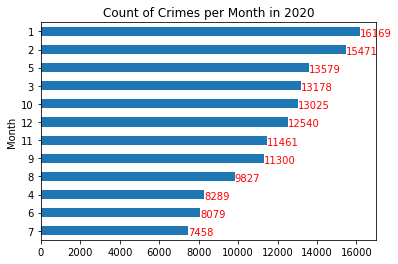

In [202]:
daily_crime = df.groupby('ARREST_DATE')["ARREST_DATE"].count()
crimes_per_year = df.groupby([df["ARREST_DATE"].dt.year])["ARREST_DATE"].count()
crimes_per_month = df.groupby([df["ARREST_DATE"].dt.year.rename("YEAR"), df["ARREST_DATE"].dt.month.rename("Month")])["ARREST_DATE"].count()
crimes_per_month = crimes_per_month.sort_values()
for year in range(2006, 2021):
    model = crimes_per_month[year].plot(kind = "barh", title = f"Count of Crimes per Month in {str(year)}")
    for i, v in enumerate(crimes_per_month[year]):
        model.text(v, i - 0.25, str(v), color = "red")
    plt.show()

[ 1.          0.60417859  0.33016108  0.20035987  0.04035547 -0.04304759
 -0.10389997 -0.21414119 -0.30920963 -0.32503578 -0.38082268]


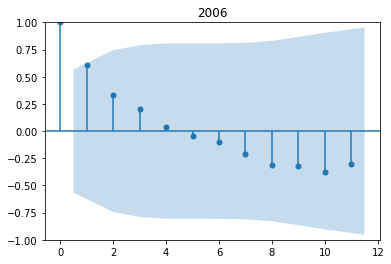

[ 1.          0.51778305  0.35699956  0.22683444  0.10221733 -0.0639066
 -0.12905423 -0.28715443 -0.30957355 -0.30260082 -0.2922603 ]


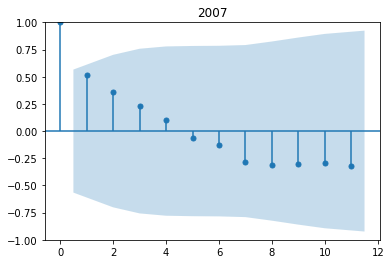

[ 1.          0.62315053  0.3266776   0.14523093  0.04840781 -0.0324272
 -0.08569559 -0.19372189 -0.28470057 -0.38269554 -0.39499819]


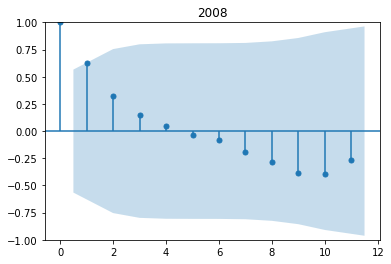

[ 1.          0.51315866  0.31473753  0.13534907  0.05116095 -0.0159435
 -0.08983695 -0.16993652 -0.25134711 -0.33401246 -0.33198883]


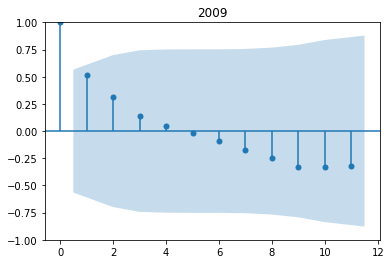

[ 1.          0.62096504  0.39278273  0.21773392  0.04467461 -0.08684614
 -0.21187173 -0.3274209  -0.34473343 -0.33169211 -0.28323334]


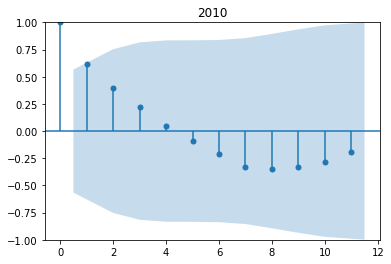

[ 1.          0.67715747  0.41457852  0.21614169  0.05405815 -0.0726448
 -0.14506445 -0.26881829 -0.34997287 -0.3913682  -0.38458075]


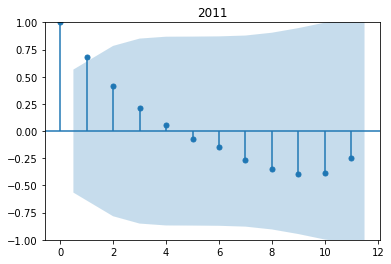

[ 1.          0.52930163  0.21229018  0.13432022  0.0373222  -0.02519514
 -0.07557213 -0.16285788 -0.24459382 -0.27400819 -0.34088928]


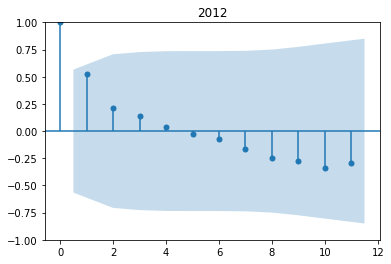

[ 1.          0.5326025   0.40229922  0.24238354  0.11573067 -0.1065296
 -0.18454866 -0.2943781  -0.30200678 -0.3250474  -0.29221006]


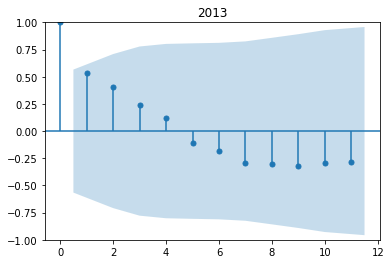

[ 1.          0.39475119  0.22174366  0.1241761   0.02716179 -0.04609667
 -0.12301516 -0.17899938 -0.21090026 -0.22493902 -0.2687683 ]


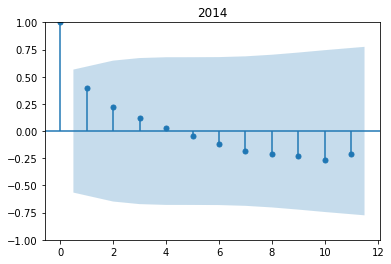

[ 1.          0.68653475  0.43622822  0.20666952 -0.0025381  -0.07429962
 -0.15256769 -0.25510587 -0.39227359 -0.385096   -0.33152576]


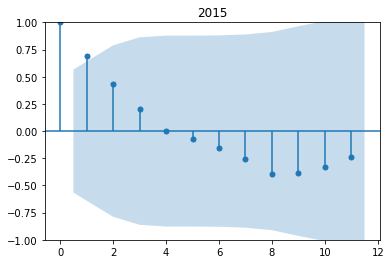

[ 1.          0.72135547  0.39837116  0.17013246 -0.01960913 -0.08768249
 -0.1423255  -0.24295722 -0.34842343 -0.37970086 -0.36765474]


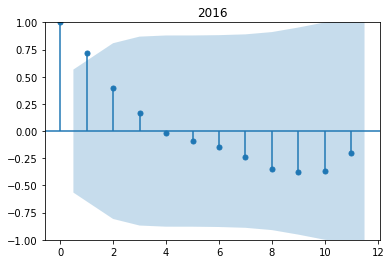

[ 1.          0.56303169  0.37367698  0.24524363  0.08743751 -0.04645021
 -0.20257995 -0.29279024 -0.32588815 -0.31001423 -0.33640888]


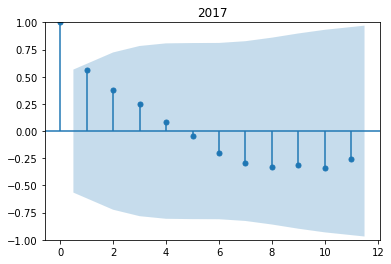

[ 1.          0.68321592  0.46334732  0.24542651  0.07696996 -0.09848
 -0.21620407 -0.32491173 -0.35141916 -0.38783094 -0.34259054]


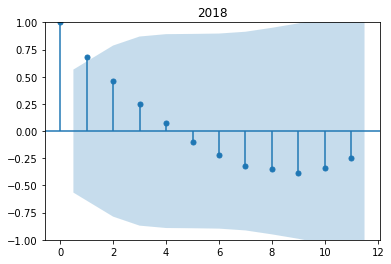

[ 1.          0.63194818  0.38504286  0.20694891  0.08867825 -0.06272983
 -0.19290593 -0.32392348 -0.34782456 -0.34466539 -0.31212026]


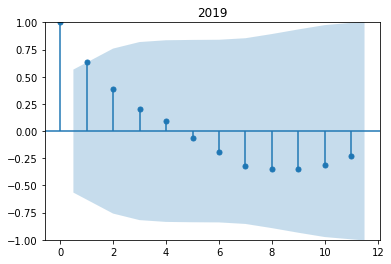

[ 1.          0.72640977  0.45153492  0.23565803  0.05929047 -0.08119988
 -0.21949037 -0.29530755 -0.38622059 -0.41505637 -0.36222255]


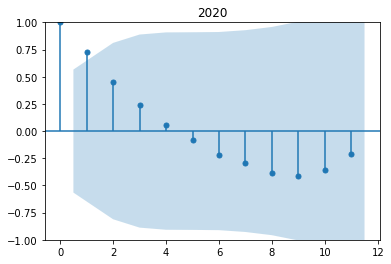

In [329]:
# print(acf(crimes_per_month[2020]))
# plot acf in order to see if there is a significant correlation between time of the year and count of crimes
for year in range(2006, 2021):
    plot_acf(crimes_per_month[year])
    print(acf(crimes_per_month[year]))
    plt.title(str(year))
    plt.show()

In [332]:
series_month = df.groupby([df["ARREST_DATE"].dt.year.rename("YEAR"), df["ARREST_DATE"].dt.month.rename("MONTH")])["ARREST_DATE"].count()
df_month = series_month.to_frame()
df_month["COUNT"] = df_month["ARREST_DATE"]
df_month.pop("ARREST_DATE")
# moving average with different amount of months as windows
df_month["MA5"] = series_month.rolling(window = 5).mean()
df_month["MA8"] = series_month.rolling(window = 8).mean()
df_month["MA10"] = series_month.rolling(window = 10).mean()
df_month["MA12"] = series_month.rolling(window = 12).mean()

# windows of 5 and 8 indicate a possible uptick in the count of crimes per month in the near future
# overall downtrend in the count of crimes is shown 


Text(0.5, 1.0, 'Moving Average of Crimes Over Month')

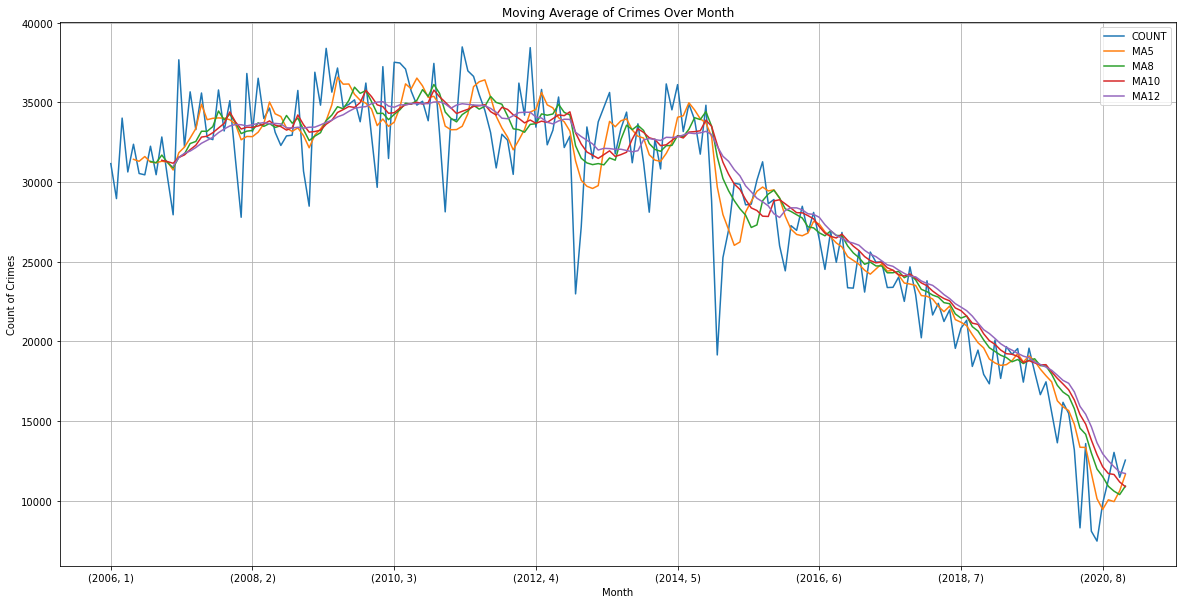

In [333]:
# graph of the count of crimes per month compared to the movign averages
model = df_month.plot(kind = "line", figsize = (20, 10), grid = True)
model.set_ylabel("Count of Crimes")
model.set_xlabel("Month")
model.set_title("Moving Average of Crimes Over Month")

In [ ]:
# x = series_month.get(2006)
# print(x)
# print(x.get(1))
# HOW TO ACCESS SERIES TYPE

Text(0.5, 1.0, 'Total Number of Crimes per Month')

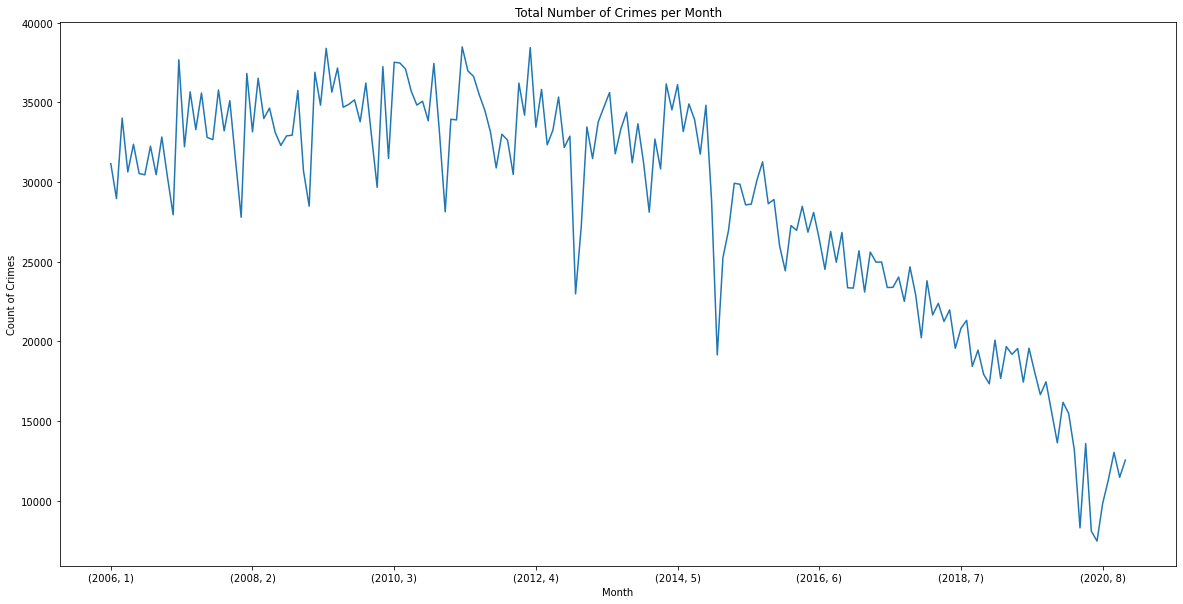

In [341]:
# line graph to show general downtrend in count of crimes per month over the years
monthly = df.groupby([df["ARREST_DATE"].dt.year.rename("YEAR"), df["ARREST_DATE"].dt.month.rename("Month")])["ARREST_DATE"].count()
model = monthly.plot(kind = "line", figsize = (20, 10))
model.set_ylabel("Count of Crimes")
model.set_xlabel("Month")
model.set_title("Total Number of Crimes per Month")

In [363]:
results = adfuller(monthly)
print(results)
print("p-value: ", results[1])
print("??")

(2.745185421026104, 1.0, 12, 167, {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}, 2983.205826628867)
p-value:  1.0
??


In [392]:
# with non-stationary data, use SARIMAX model to forecast
order_aic_bic = [] 
# loop over AR order
for p in range(3):
    # loop over MA order
    for q in range(3):
        try:
            # fit model
            model = SARIMAX(monthly, order = (p, 0, q))
            results = model.fit()
            # add order and scores to list
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            # add AIC and BIC as None when fails
            order_aic_bic.append((p, q, None, None))

# create dataframe to sort and print
order_df = pd.DataFrame(order_aic_bic, columns = ["p", "q", "aic", "bic"]) 
order_df.sort_values("aic")
print(order_df)

/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17099D+01    |proj g|=  5.32907D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.329D-10   1.171D+01
  F =   11.709880362324970     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupporte

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.32916D+00    |proj g|=  4.75365D-02

At iterate    5    f=  9.32705D+00    |proj g|=  3.49963D-03

At iterate   10    f=  9.32313D+00    |proj g|=  2.12861D-02

At iterate   15    f=  9.32014D+00    |proj g|=  1.32368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   1.351D-05   9.320D+00
  F =   9.3201188000475597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/kevinsong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.



At iterate   25    f=  9.31039D+00    |proj g|=  1.34958D-03

At iterate   30    f=  9.31035D+00    |proj g|=  3.39133D-05

At iterate   35    f=  9.31035D+00    |proj g|=  1.99588D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     49      1     0     0   1.650D-04   9.310D+00
  F =   9.3103442981498326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
   p  q          aic          bic
0  0  0  4217.556930  4220.749887
1  0  1  4095.607165  4101.993078
2  0  2  4065.160287  4074.739157
3  1  0  3411.870620  3418.256533
4  1  1  3361.545760  3371.124631
5  1  2  3363.242768  3376.014595

Text(0.5, 1.0, 'Differencing Total Number of Crimes')

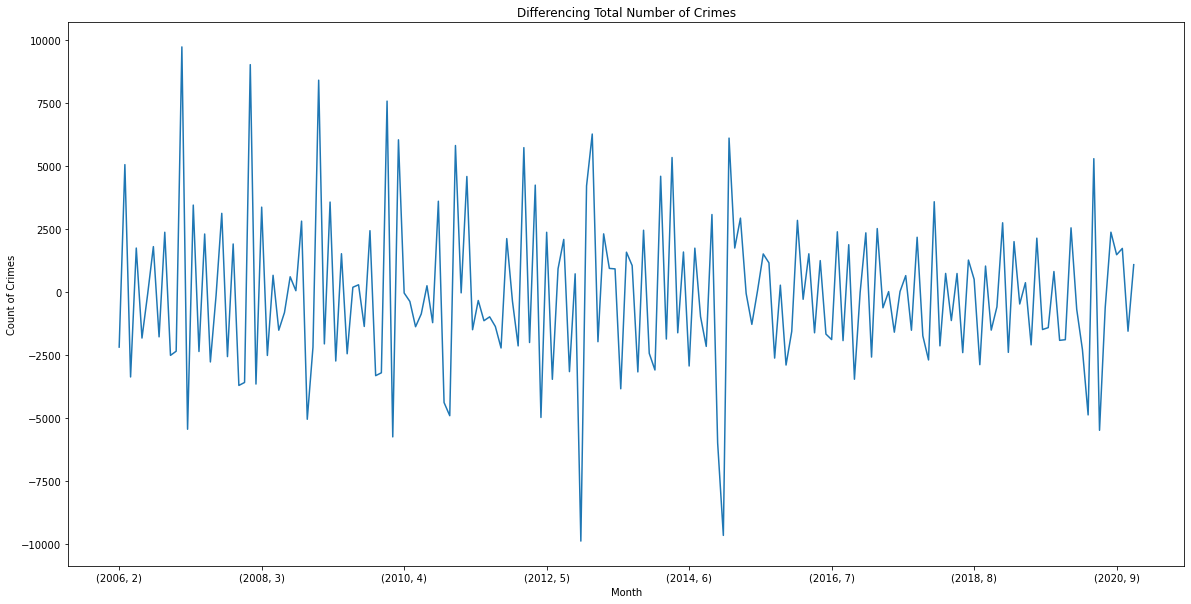

In [388]:
# convert non-stationary to stationary dataset using difference
# with stationary data, use ARIMA model to forecast
df_stationary = monthly.diff().dropna()
model = df_stationary.plot(kind = "line", figsize = (20, 10))
model.set_ylabel("Count of Crimes")
model.set_xlabel("Month")
model.set_title("Differencing Total Number of Crimes")

In [422]:
stationary_data = [0]
for year in range(2006, 2021):
    for i in df_stationary.get(year):
        stationary_data.append(i)
data = {"Count": stationary_data}
dfStation = pd.DataFrame(data)
results = adfuller(dfStation)
print(results)
print("p-value: ", results[1])

(-3.123070665719234, 0.02489230110065127, 14, 165, {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}, 2986.4756055804905)
p-value:  0.02489230110065127


In [423]:
# with non-stationary data, use SARIMAX model to forecast
order_aic_bic = [] 
# loop over AR order
for p in range(3):
    # loop over MA order
    for q in range(3):
        try:
            # fit model
            model = SARIMAX(dfStation, order = (p, 0, q))
            results = model.fit()
            # add order and scores to list
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            # add AIC and BIC as None when fails
            order_aic_bic.append((p, q, None, None))

# create dataframe to sort and print
order_df = pd.DataFrame(order_aic_bic, columns = ["p", "q", "aic", "bic"]) 
order_df.sort_values("aic")
print(order_df)    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45343D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   9.453D+00
  F =   9.4534339856946143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   6.745D-06   9.320D+00
  F =   9.3195865987062199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31468D+00    |proj g|=  3.67063D-02

At iterate    5    f=  9.29926D+00    |proj g|=  5.48567D-02

At iterate   10    f=  9.29451D+00    |proj g|=  2.72086D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


In [371]:
# successfully transformed non-stationary data to stationary
# p-value is less than 0.05, therefore successfully reject null hypothesis
results = adfuller(df_stationary)
print(results)
print("p-value: ", results[1])

(-3.170421587054216, 0.021761912123498626, 14, 164, {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}, 2969.0306187611654)
p-value:  0.021761912123498626


[ 1.         -0.62355113  0.3059554  -0.10146844 -0.20111452  0.33421287
 -0.30228592  0.27744186 -0.14893191 -0.09550344  0.05524522]


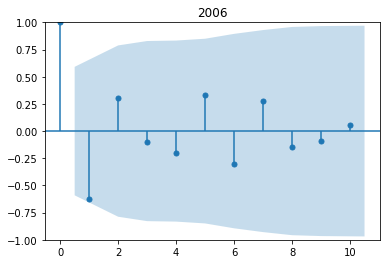

[ 1.         -0.48899978  0.30249391 -0.1643784   0.03866477  0.02838008
 -0.15018669  0.25534033 -0.19691261  0.13093281 -0.08210612]


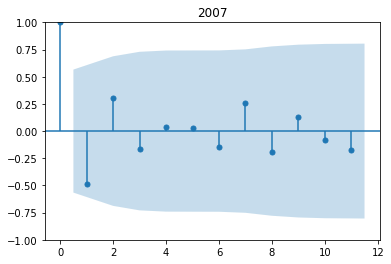

[ 1.         -0.37723159  0.25409558 -0.21448377  0.03802865  0.01712455
 -0.10702583  0.16721536 -0.13859217  0.23431305 -0.24247817]


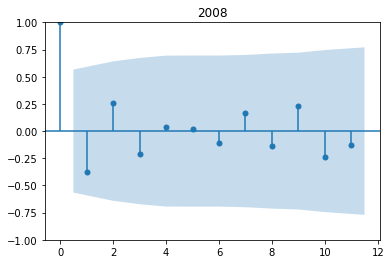

[ 1.         -0.32805599  0.33474775 -0.20592505  0.06130516 -0.03630617
 -0.05885887  0.1344226  -0.14870174  0.11521172 -0.1604483 ]


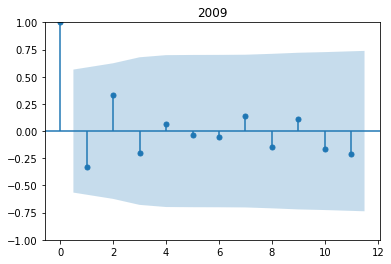

[ 1.         -0.40812748  0.18179937 -0.01912391 -0.01298043  0.02522614
 -0.03837951  0.17510839 -0.29915472  0.12363013 -0.03137766]


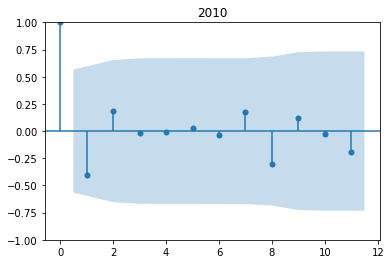

[ 1.         -0.07082825  0.32565613 -0.06510333 -0.02875935 -0.10015291
 -0.22314544  0.03181405 -0.16760518  0.00845111 -0.03508877]


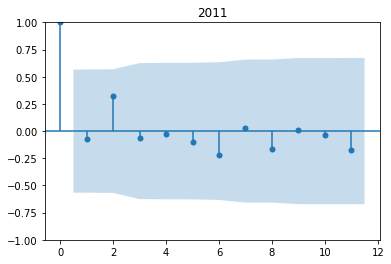

[ 1.         -0.54320566  0.39080711 -0.31563929  0.01734675  0.18323674
 -0.23879114  0.35474998 -0.36708555  0.18820636 -0.2876436 ]


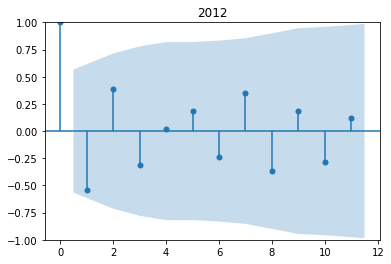

[ 1.         -0.3116712   0.06048377  0.21130851 -0.01465986 -0.20861893
  0.12416565  0.13123712 -0.33288132  0.12745397 -0.09035726]


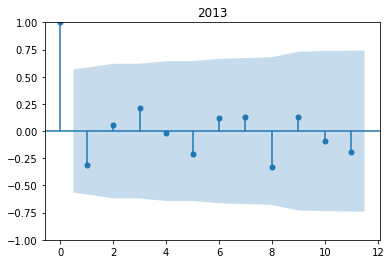

[ 1.         -0.04666959  0.11930105  0.01484813  0.0365816  -0.07914241
  0.04290594  0.03551962 -0.17304354 -0.13469611 -0.08638595]


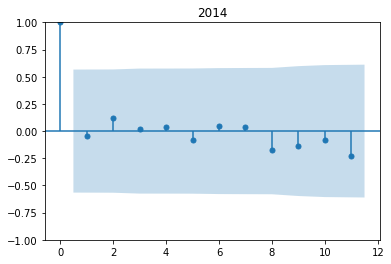

[ 1.          0.24238791  0.20714851 -0.04347066 -0.10951072  0.02795162
  0.08591298  0.06831353 -0.35773497 -0.14828682 -0.30943427]


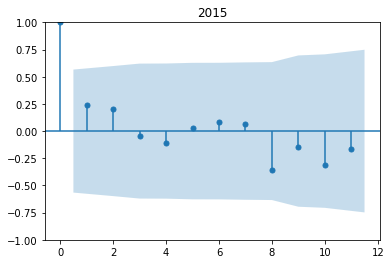

[ 1.         -0.52716564  0.38791978 -0.22542684 -0.03854631  0.22600625
 -0.35661401  0.34960959 -0.24675156  0.14262703 -0.21595219]


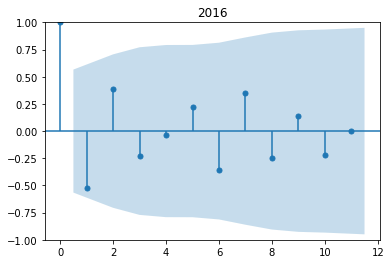

[ 1.         -0.47639342  0.15560762 -0.02776018 -0.05114396  0.02161017
 -0.07611657  0.30999868 -0.31600127  0.07806477  0.04750414]


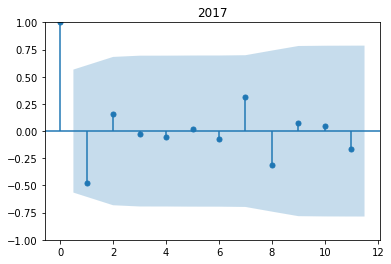

[ 1.         -0.55651366  0.20766595 -0.00941051  0.02916644 -0.11810216
  0.0037838   0.2552068  -0.34674226  0.17828816 -0.10850996]


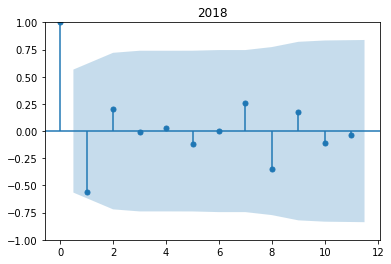

[ 1.         -0.51373272  0.23889701  0.0295844   0.18119447 -0.35442543
  0.23737438  0.01288434 -0.24342249  0.08287107 -0.04244714]


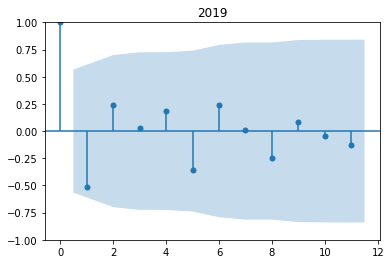

[ 1.         -0.37401007 -0.01357844  0.00528555  0.08318162 -0.0891707
 -0.26881666  0.13660537  0.00593016  0.02842928 -0.04210449]


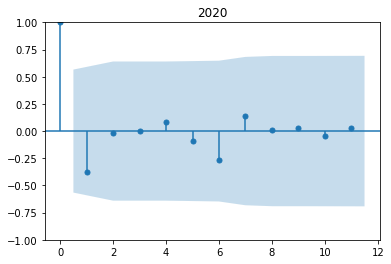

In [328]:
for year in range(2006, 2021):
    plot_acf(df_stationary[year])
    print(acf(df_stationary[year]))
    plt.title(str(year))
    plt.show()

In [ ]:
model = crimes_per_year.plot(kind = "line", xticks = crimes_per_year.index.values, figsize = (10, 5))
model.set_ylabel("Count of Crimes")
model.set_xlabel("Years")
model.set_title("Total Number of Crimes per Year")

In [ ]:
unique_ofns = df.OFNS_DESC.unique()
unique_ofns.sort()

In [313]:
total_ofns = df.groupby("OFNS_DESC")["OFNS_DESC"].count().sort_values()
percent_ofns = total_ofns / len(df) * 100
# ensures the sum of percentage of crime in category is 100%
assert int(percent_ofns.sum()) == 100
percent_ofns.sort_values(inplace = True)

In [318]:
# add sum of "OTHER" percentages of crimes that aren't in the top 15 crimes
acc = percent_ofns[:-16].sum()
# add to the series to plot
newSeries = pd.Series([acc], index=["OTHER"])
top15 = percent_ofns[-15:]
top15 = newSeries.append(top15)

Text(0.5, 0, 'Crime Percentage')

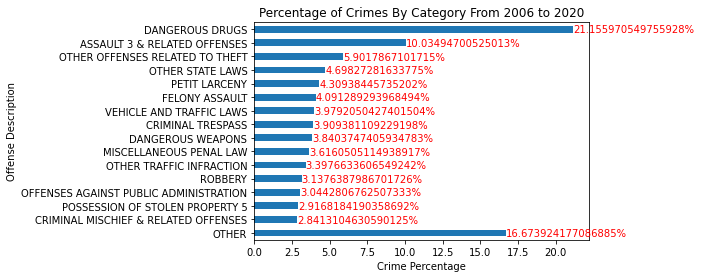

In [315]:
# graph of top 15 crime types percentages + sum of the other 72 crimes
ofns_model = top15.plot(kind = "barh", title = "Percentage of Crimes By Category From 2006 to 2020")
for i, v in enumerate(top15):
        ofns_model.text(v, i - 0.25, str(v) + "%", color = "red")
ofns_model.set_ylabel("Offense Description")
ofns_model.set_xlabel("Crime Percentage")

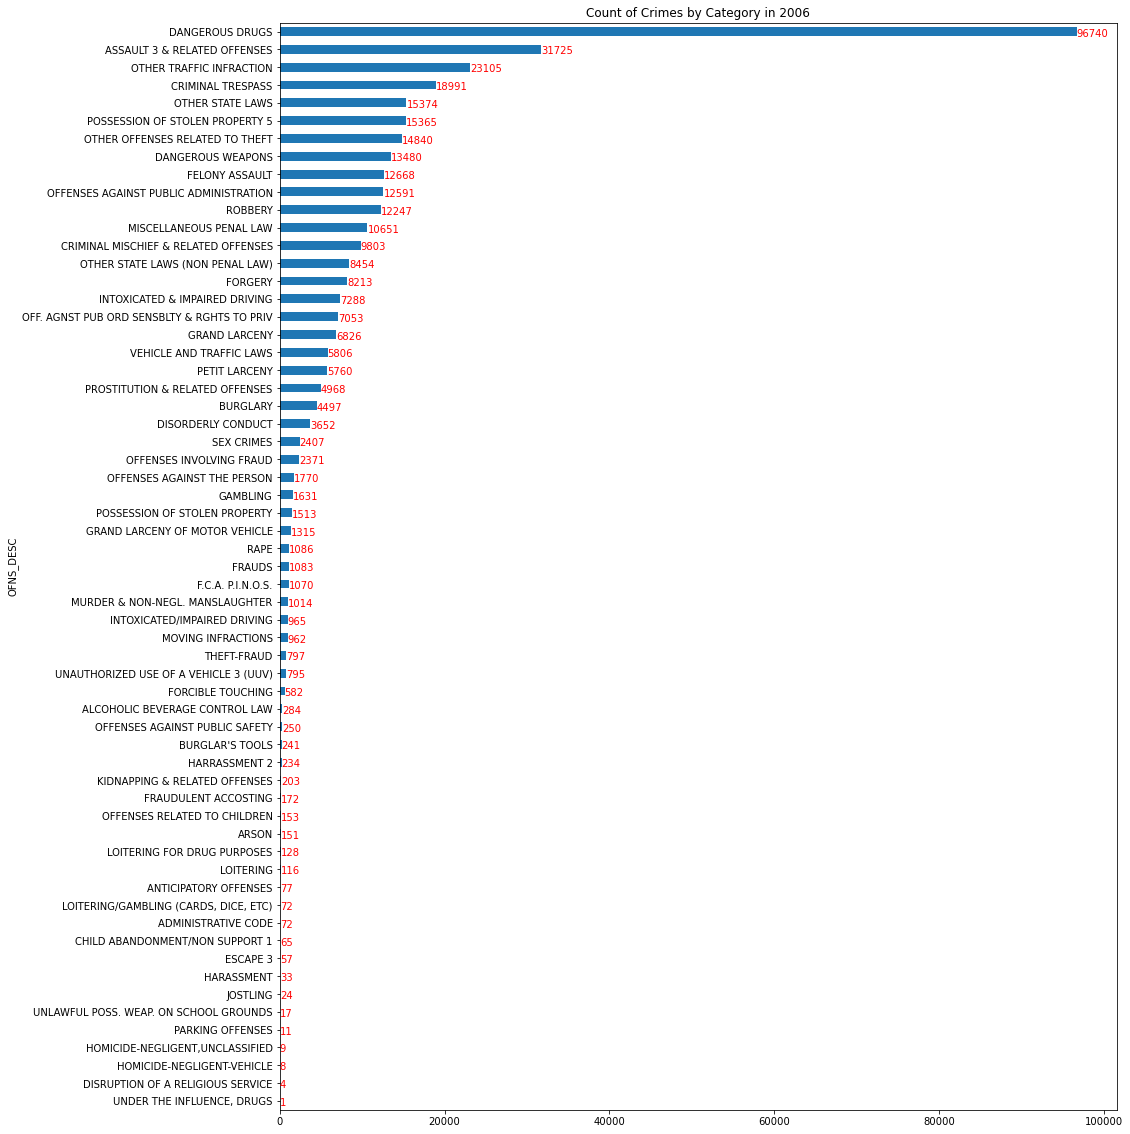

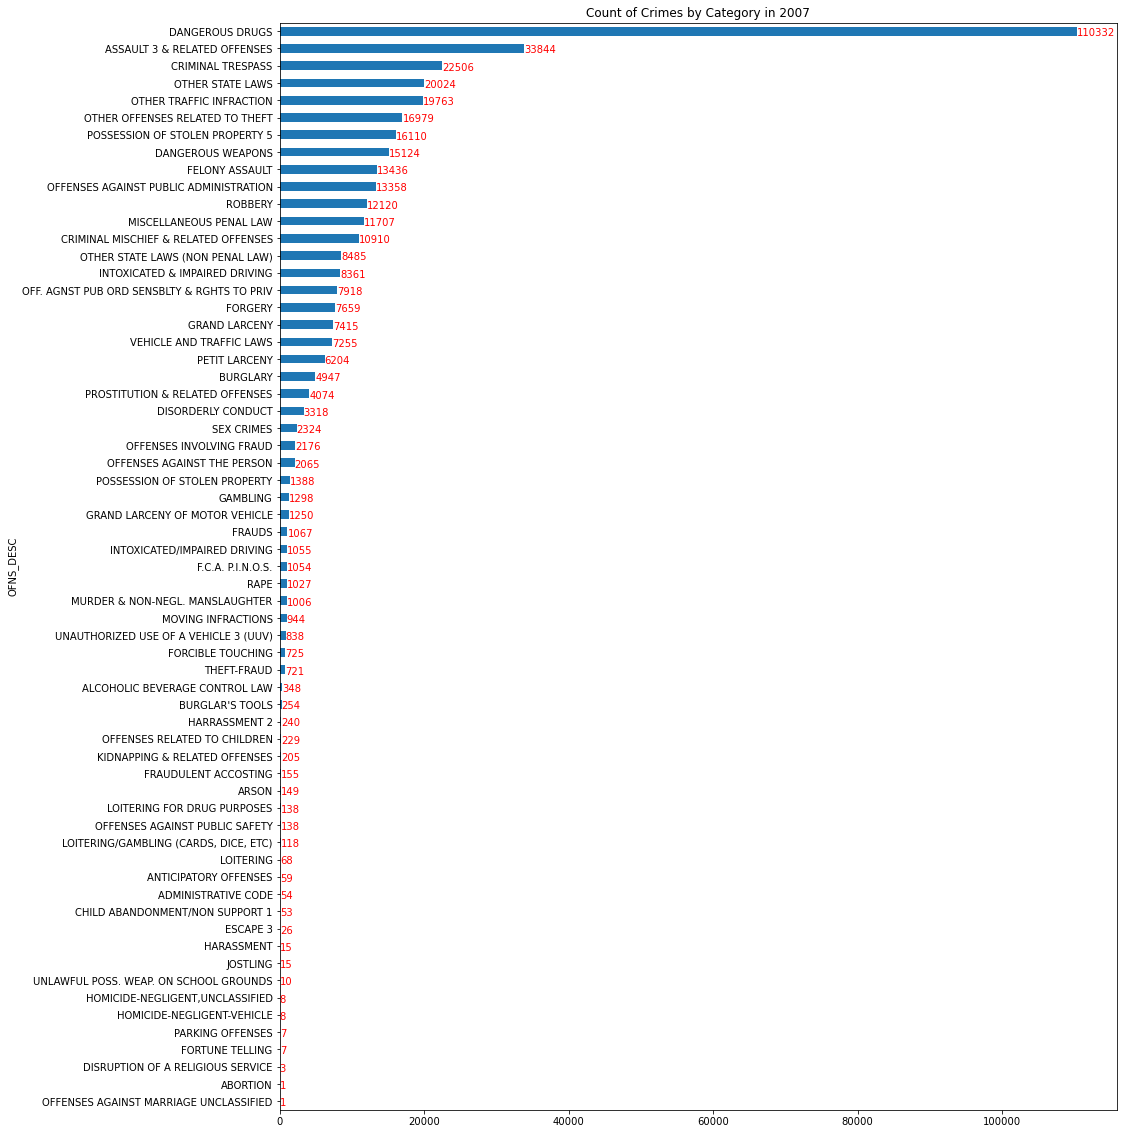

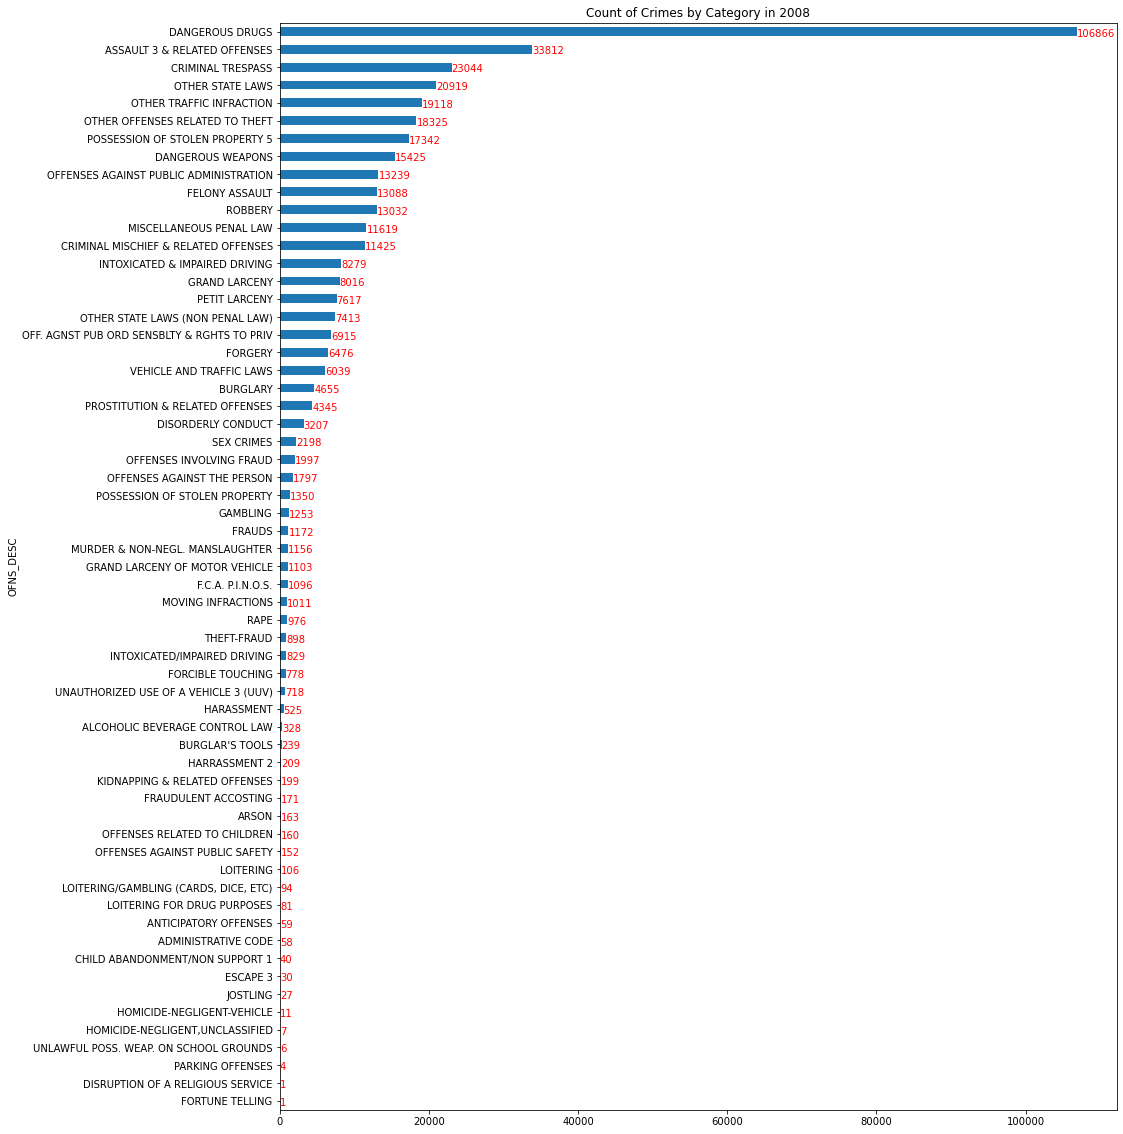

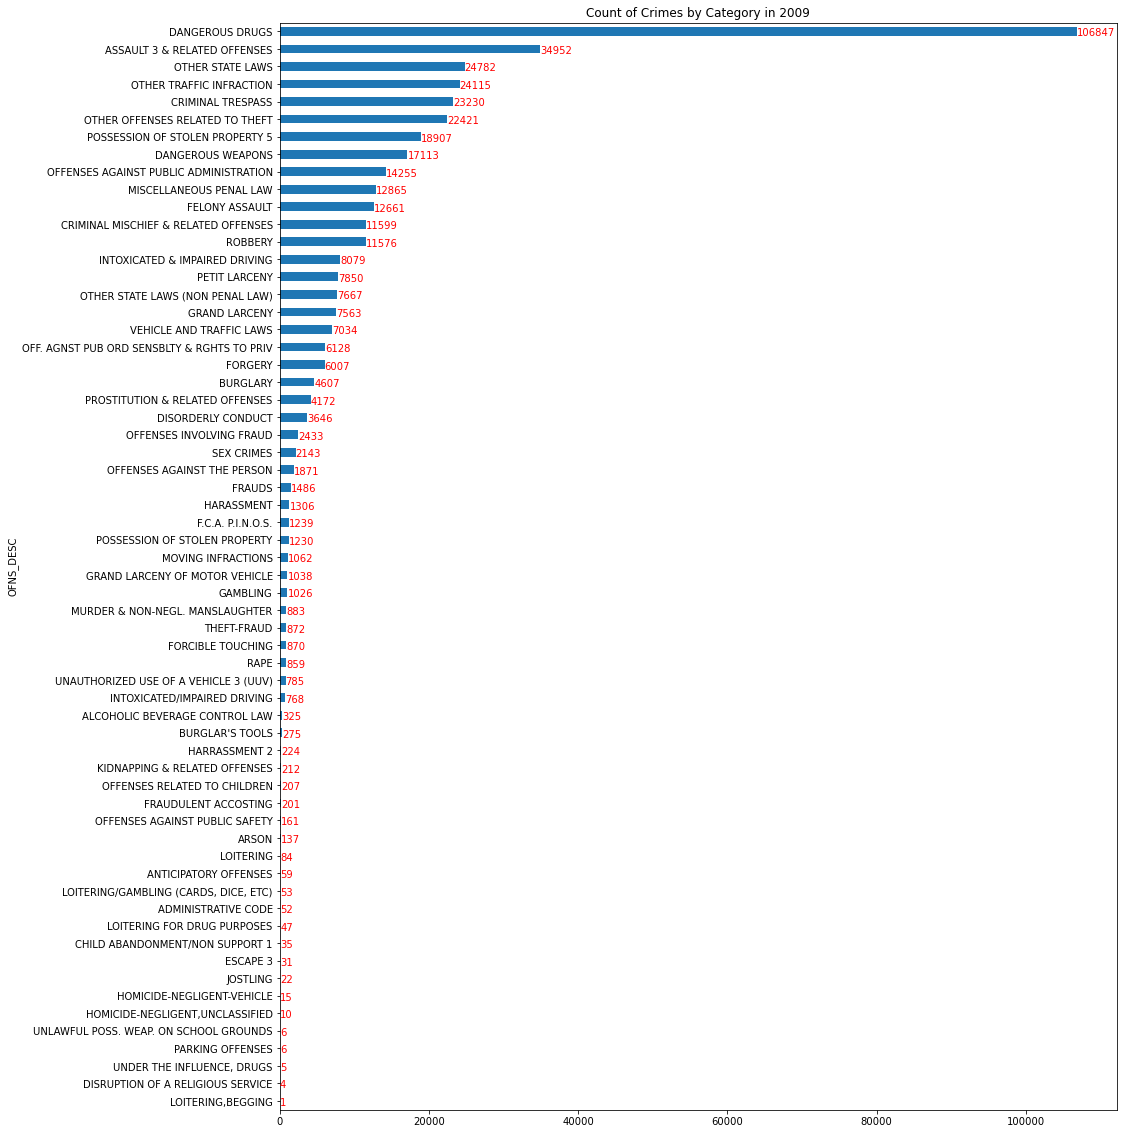

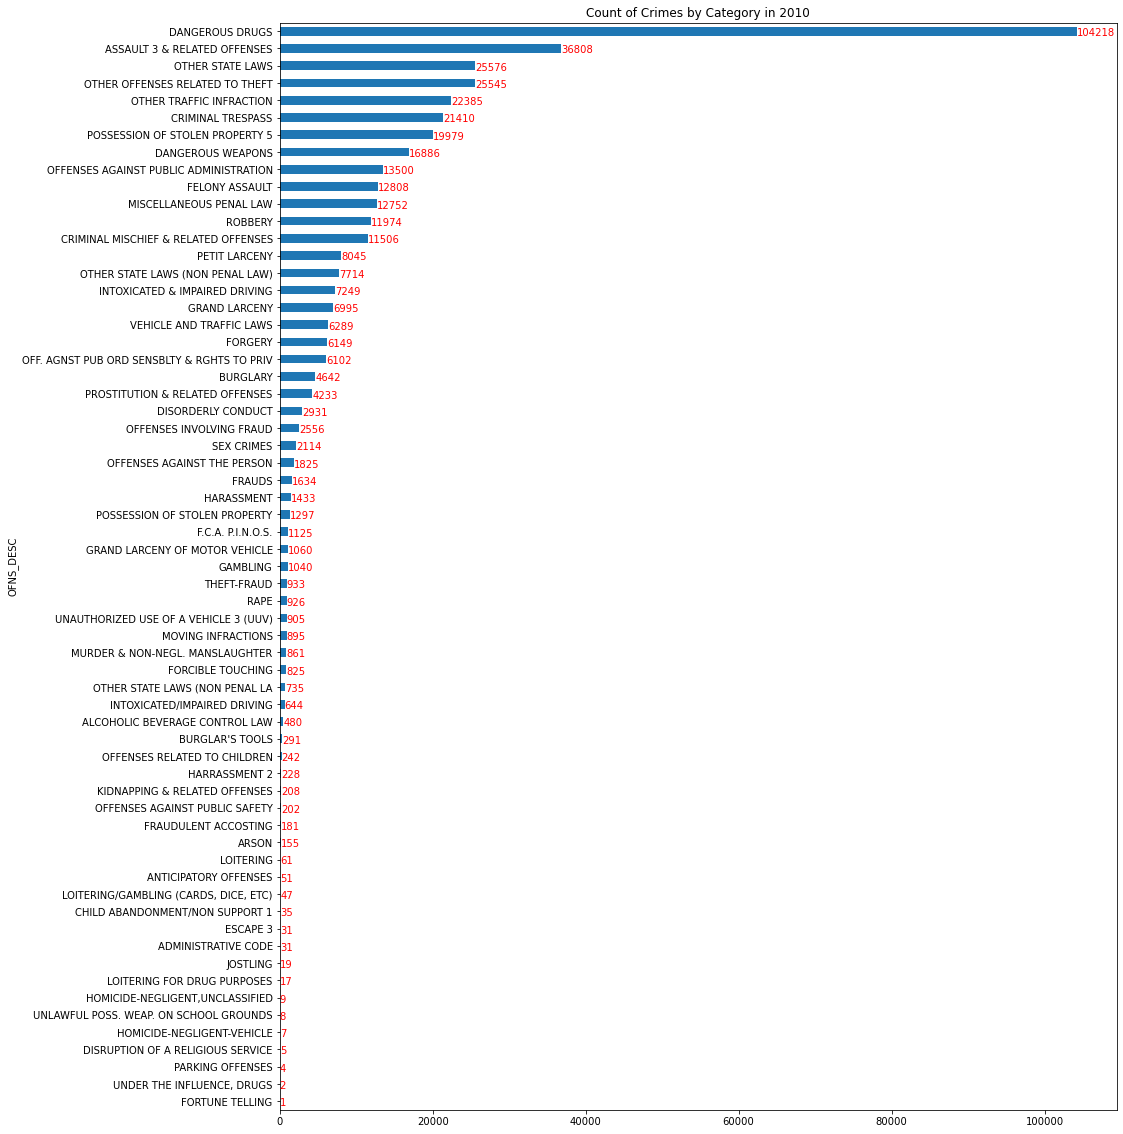

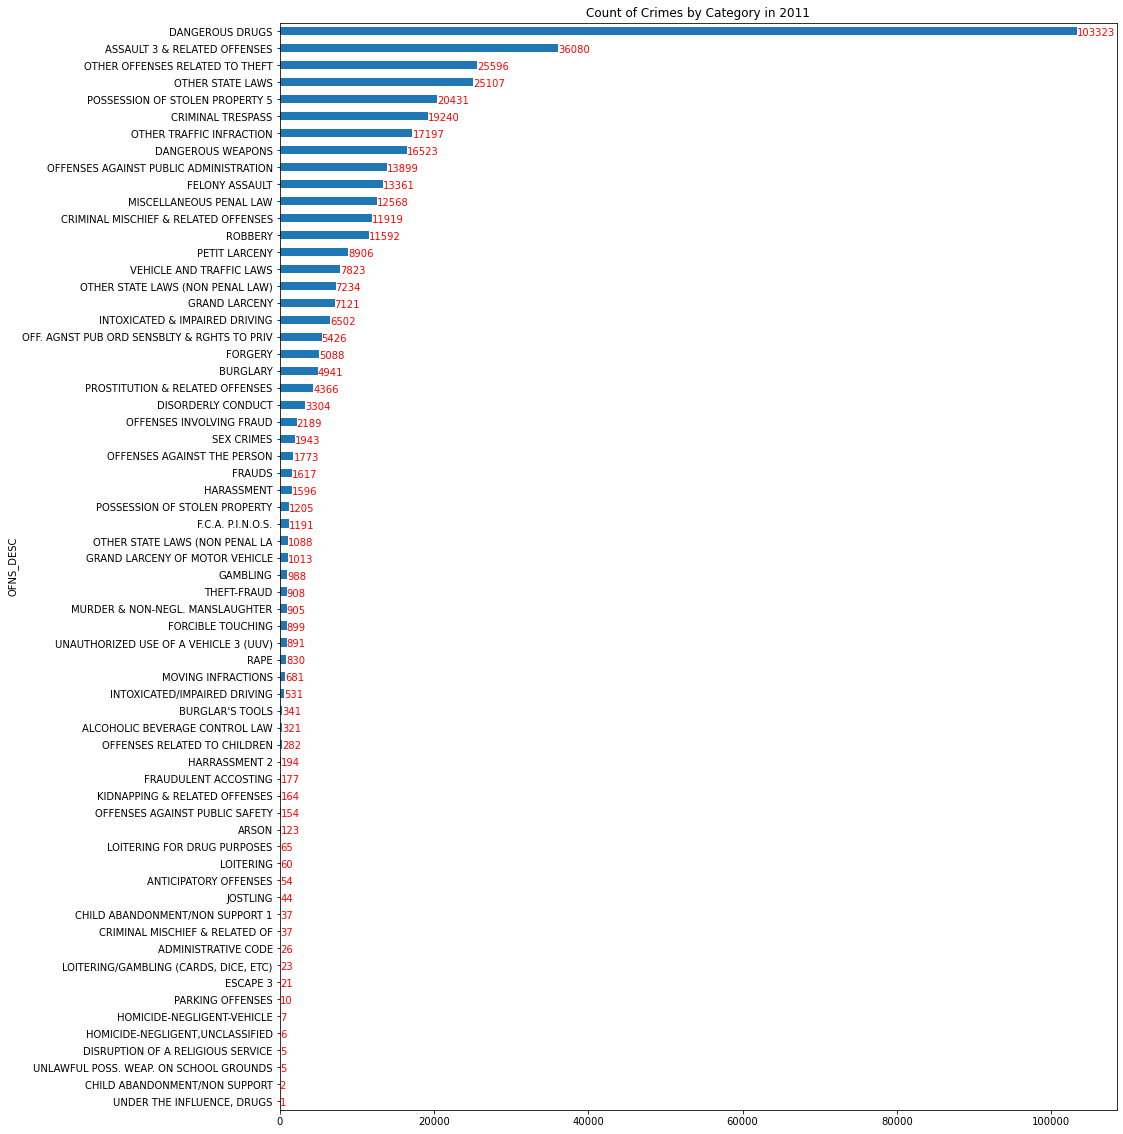

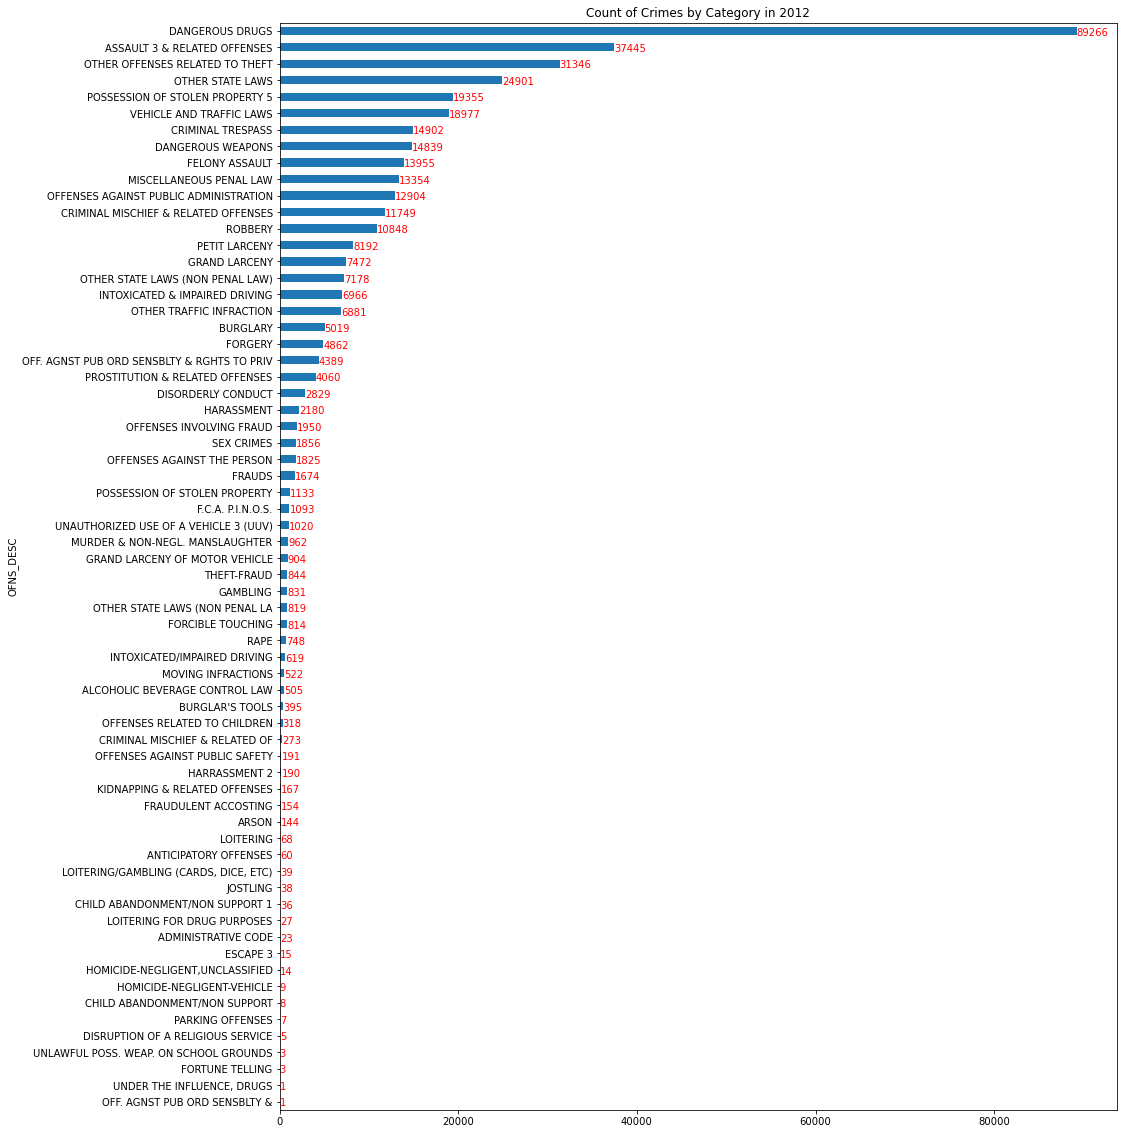

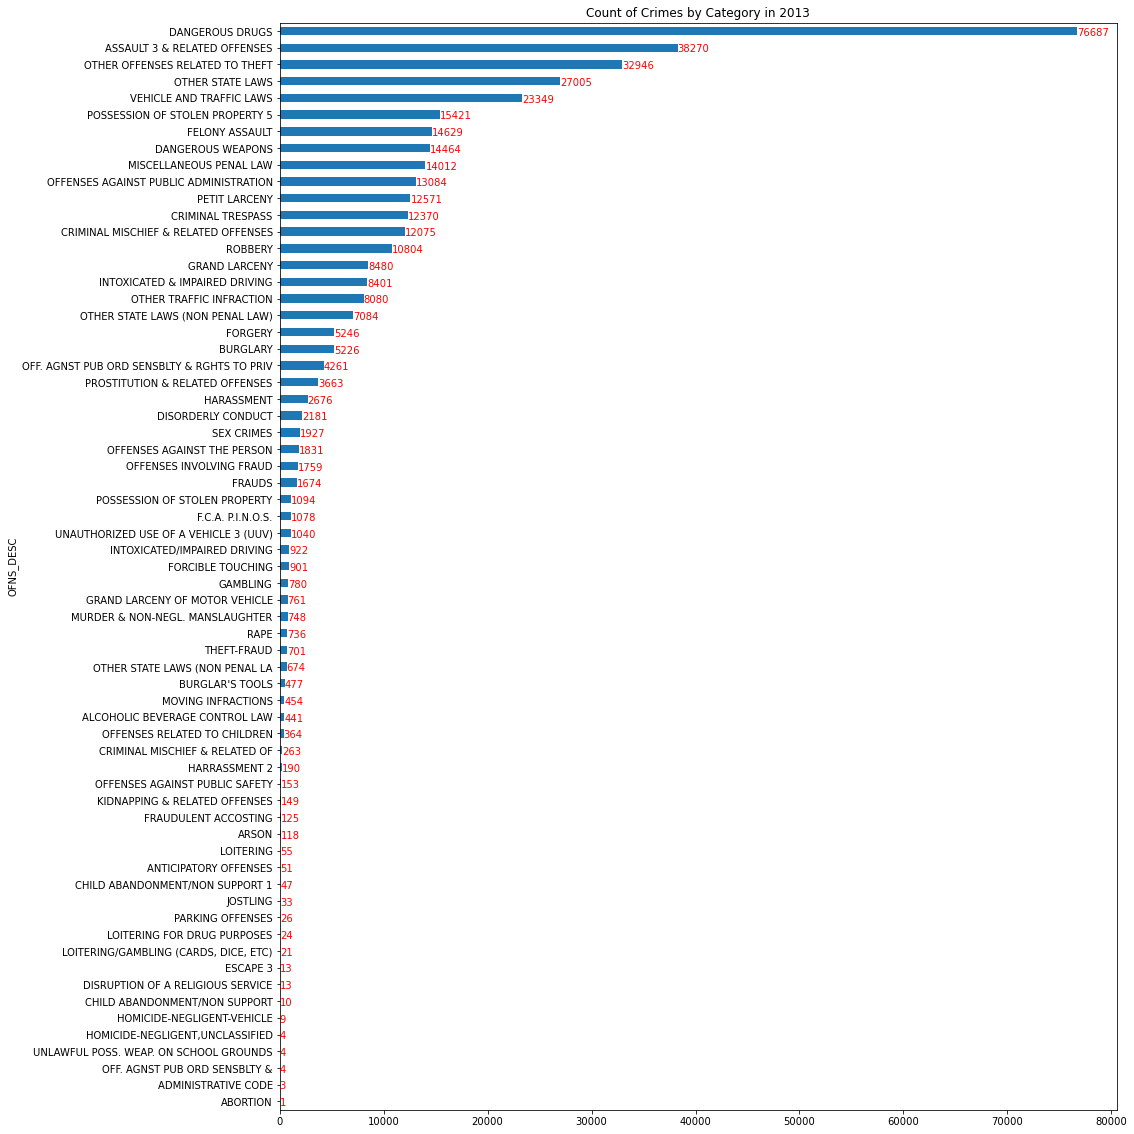

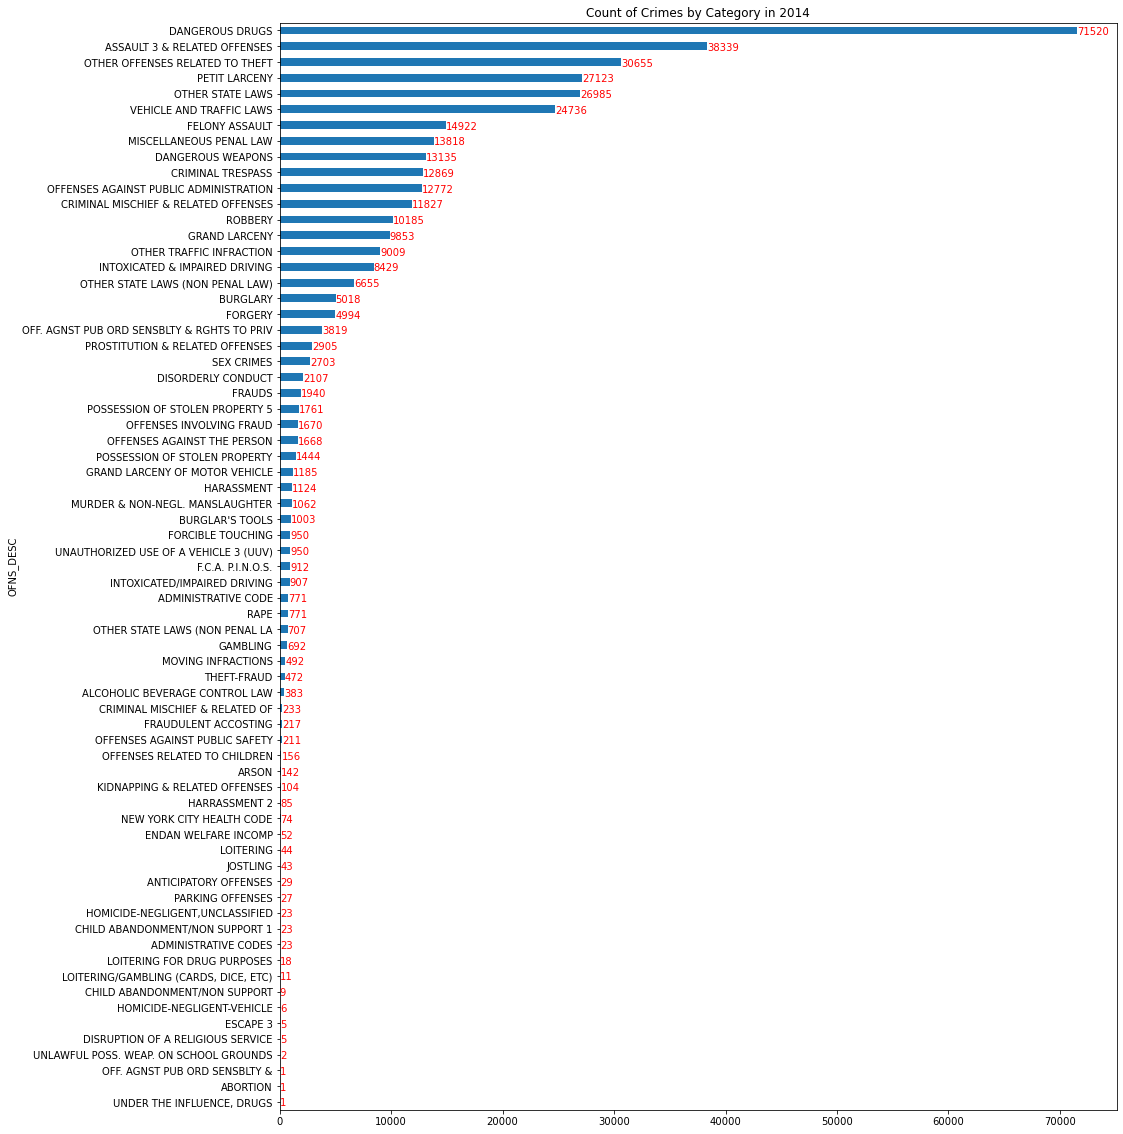

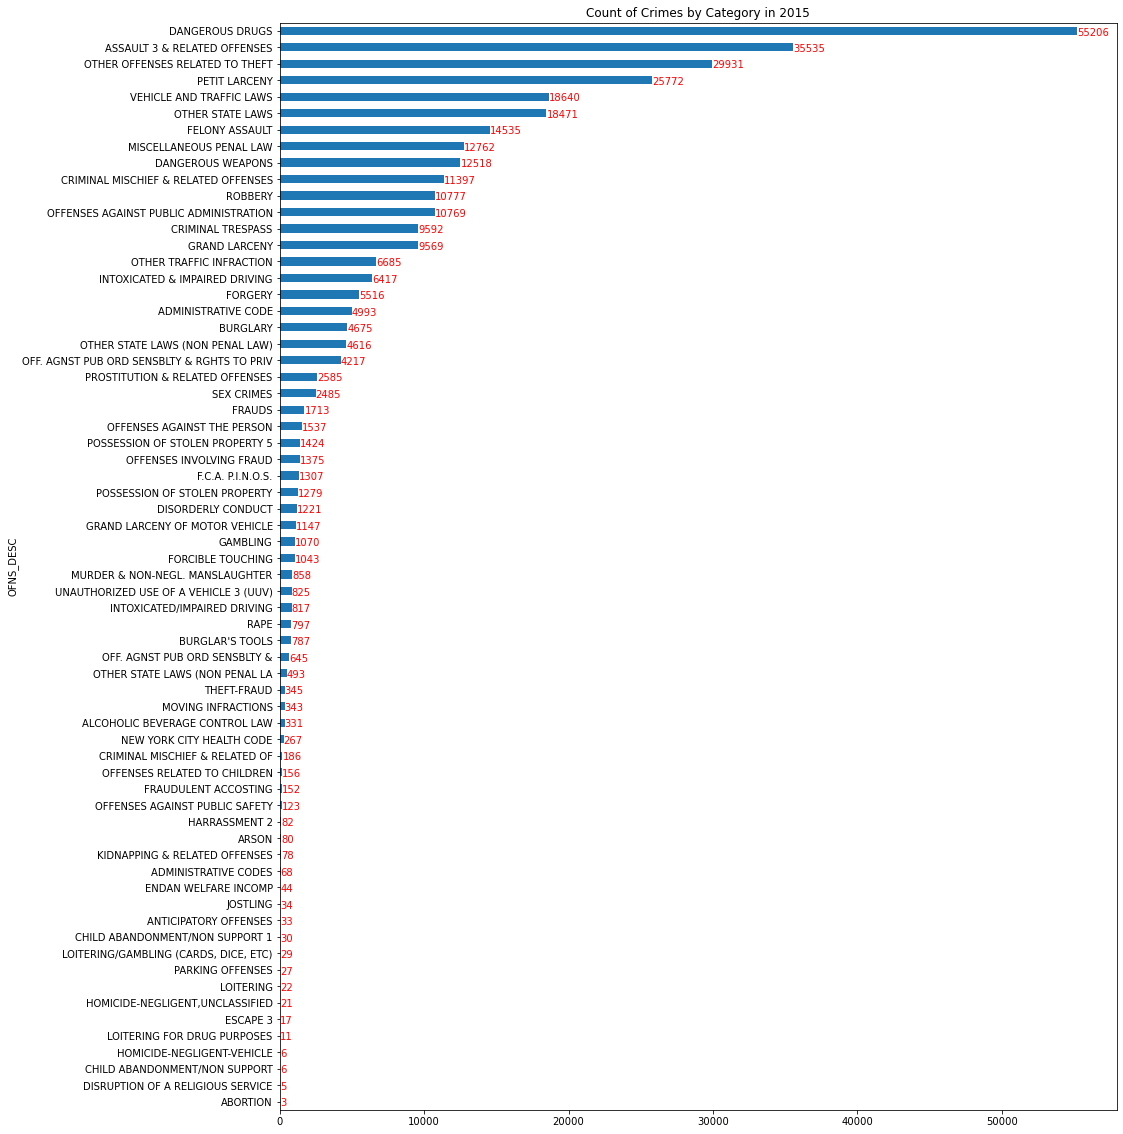

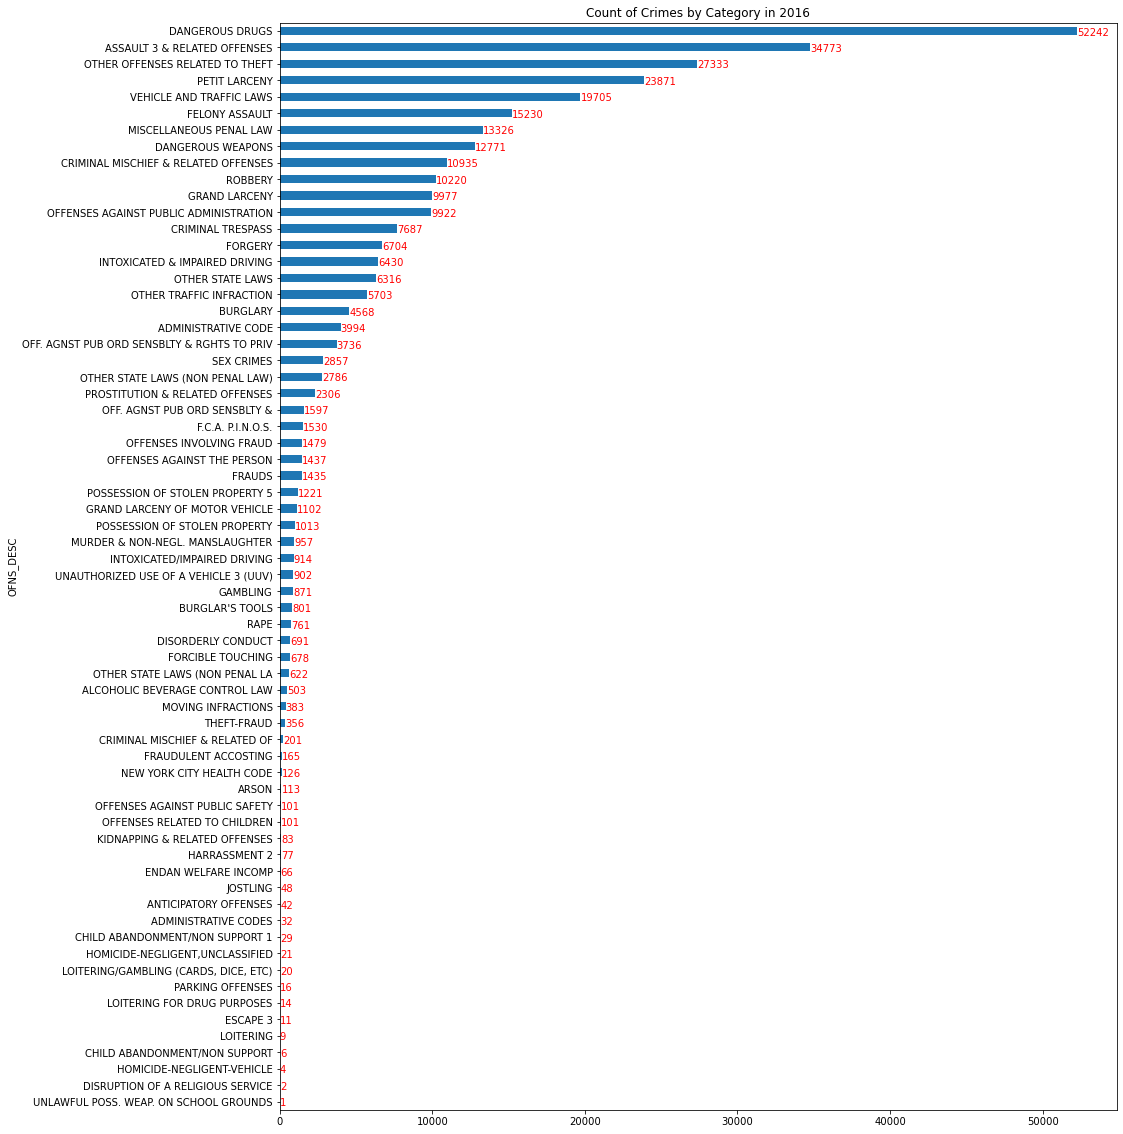

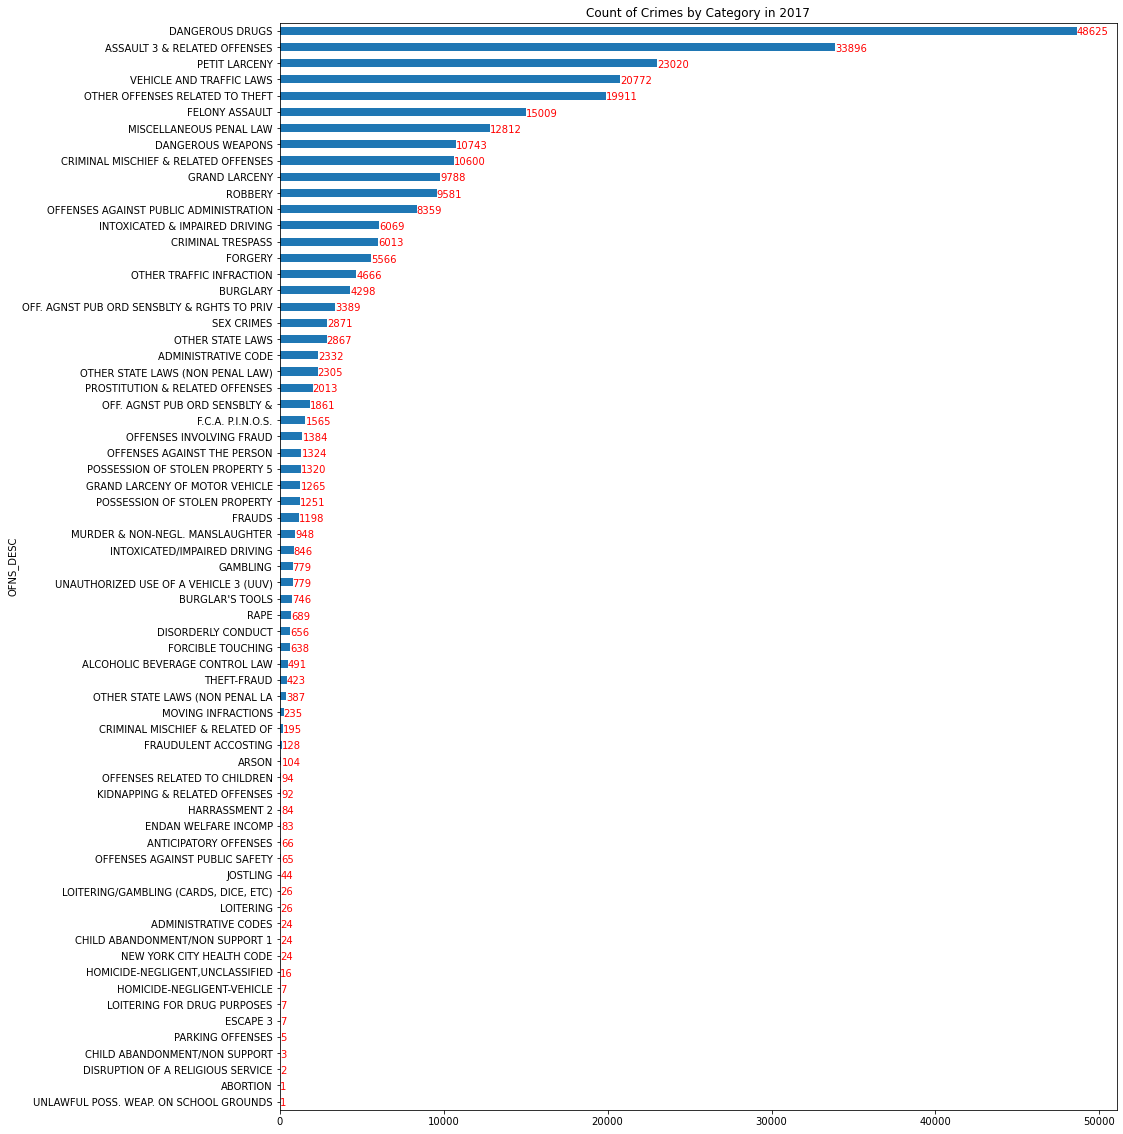

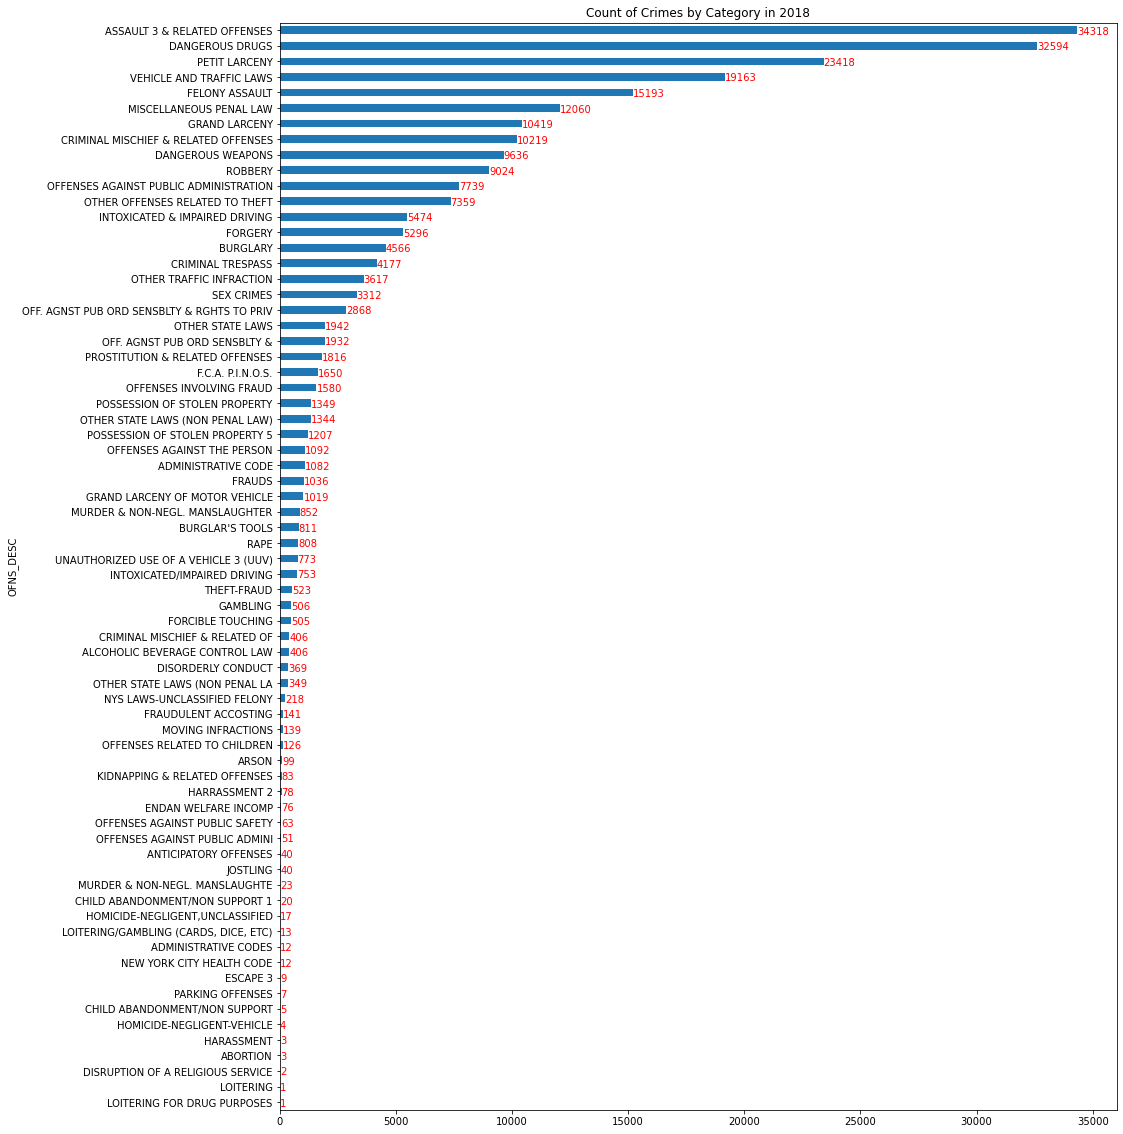

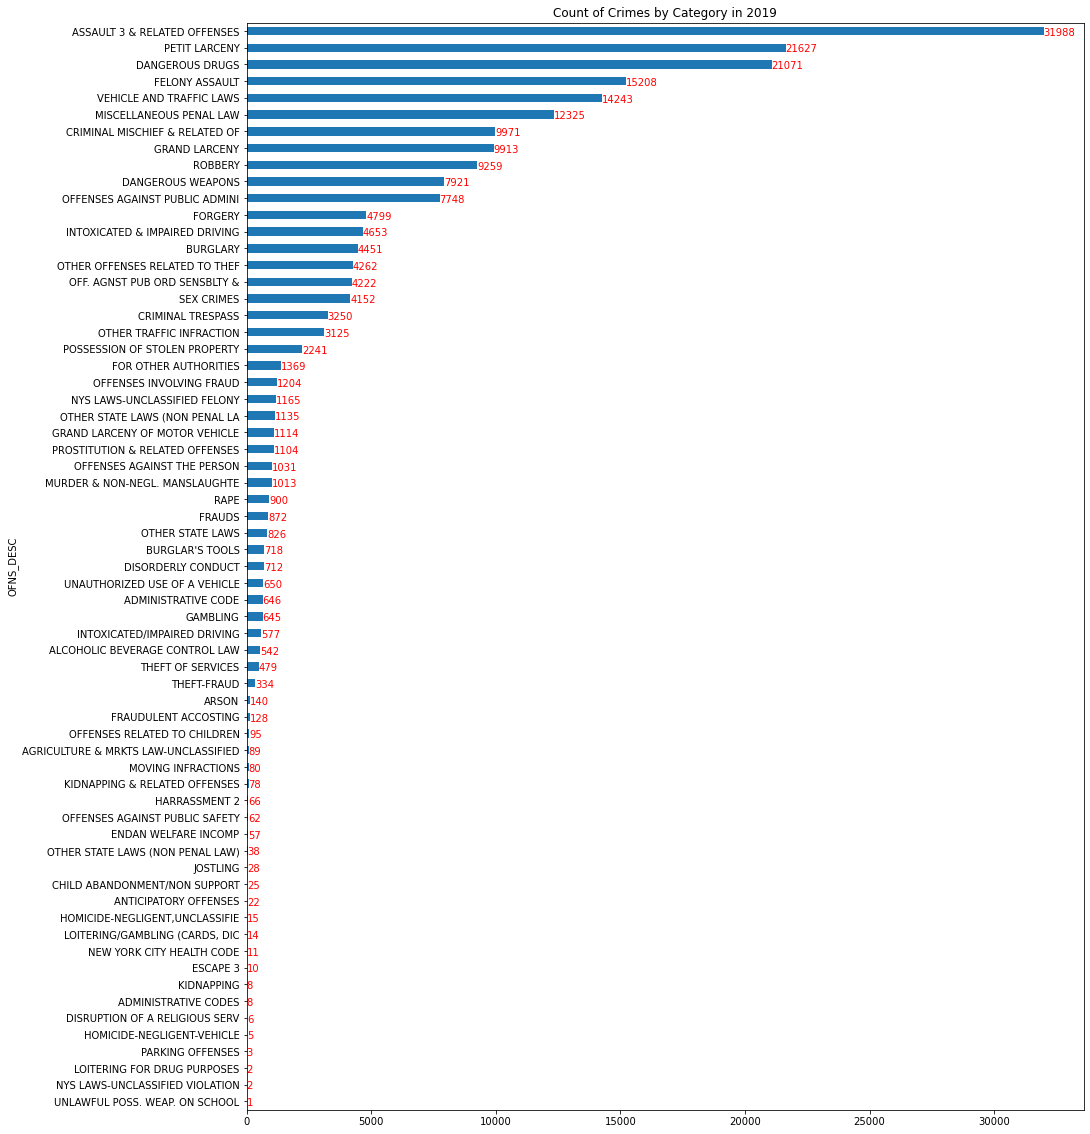

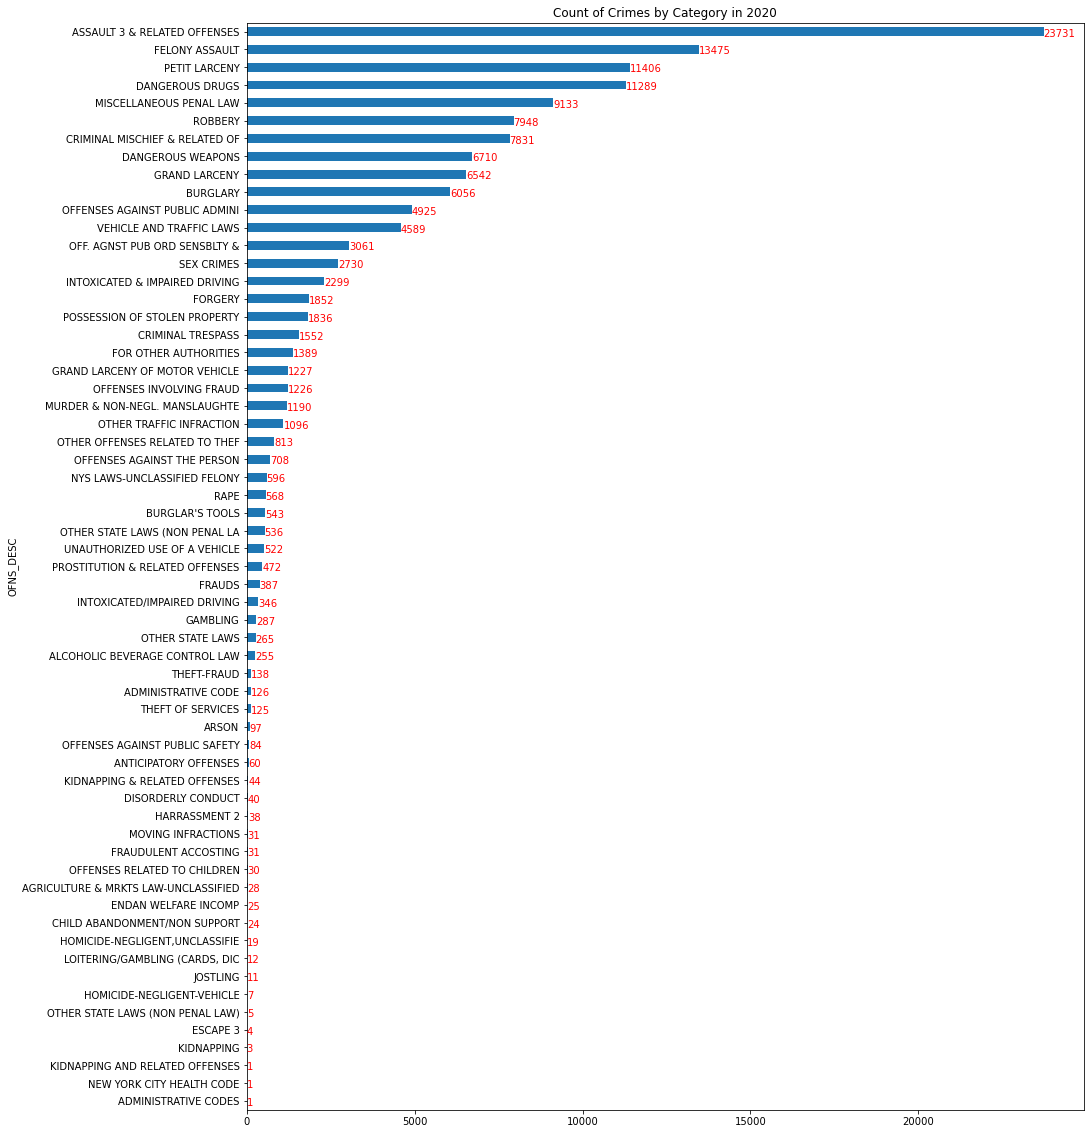

In [108]:
cat_per_year = df.groupby([df["ARREST_DATE"].dt.year, df["OFNS_DESC"]])["OFNS_DESC"].count().sort_values()
for year in range(2006, 2021):
    model = cat_per_year[year].plot(kind = "barh", title = f"Count of Crimes by Category in {str(year)}", figsize = (15, 20))
    for i, v in enumerate(cat_per_year[year]):
        model.text(v, i - 0.25, str(v), color = "red")
    plt.show()

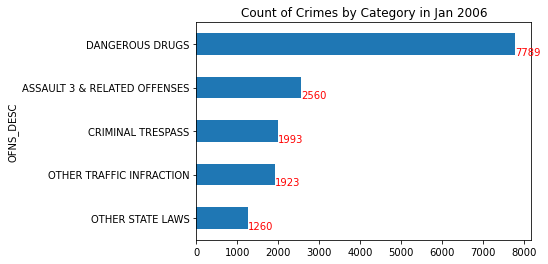

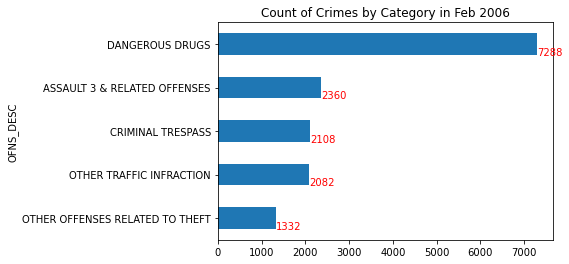

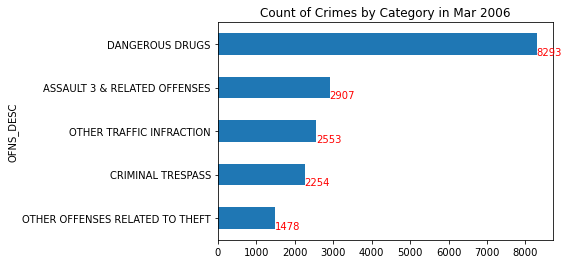

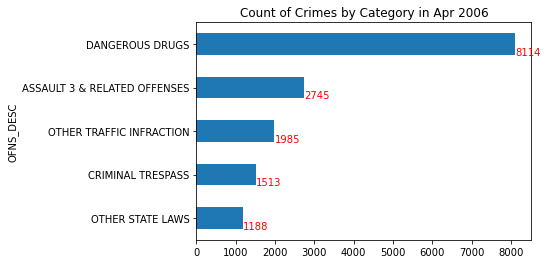

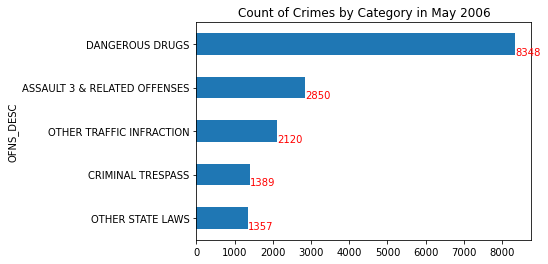

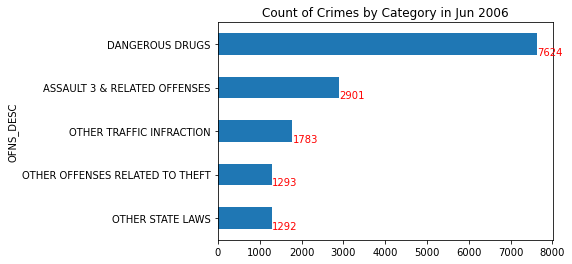

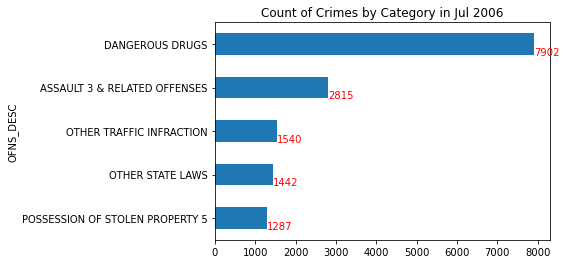

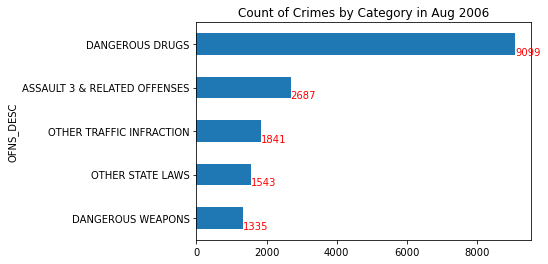

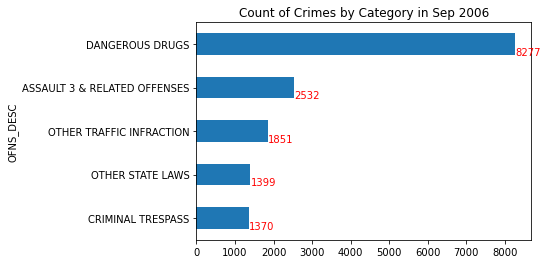

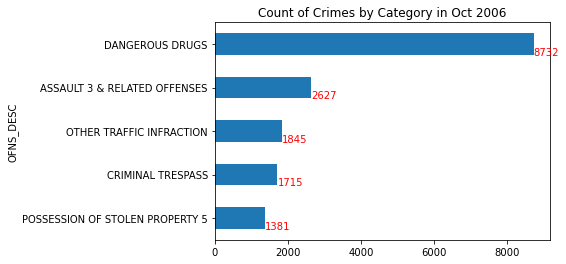

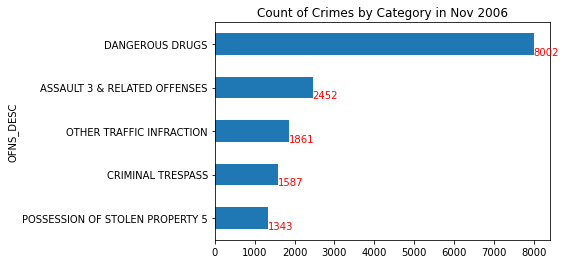

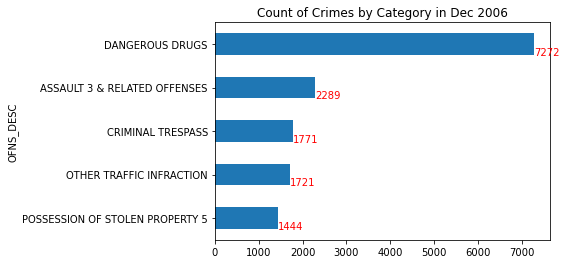

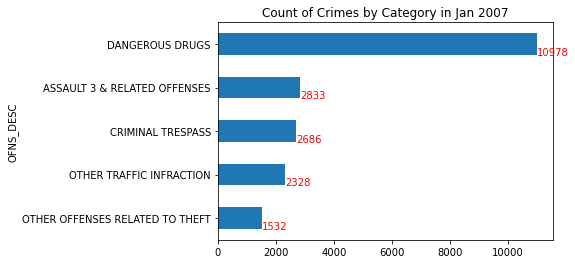

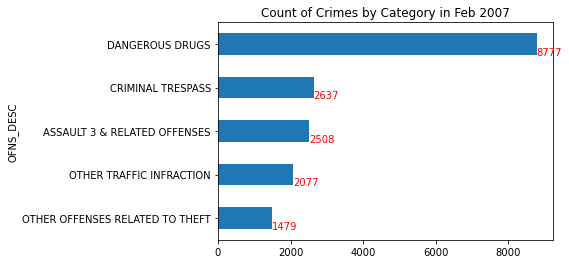

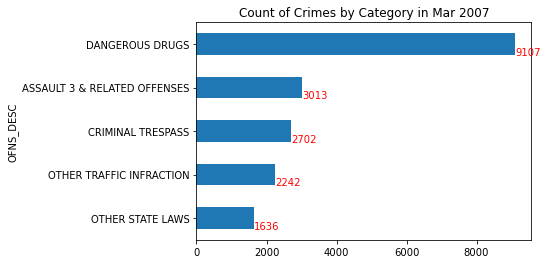

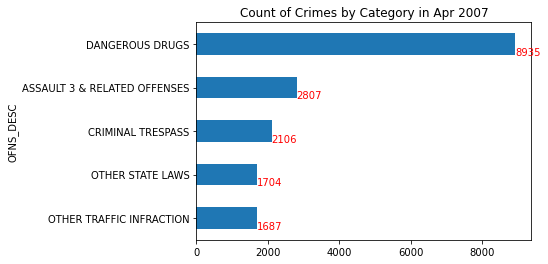

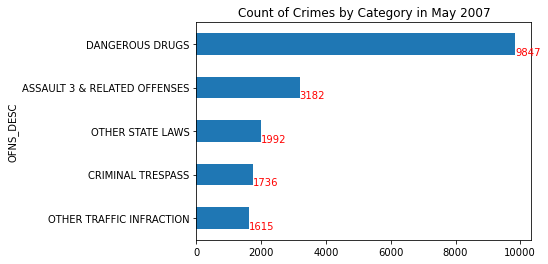

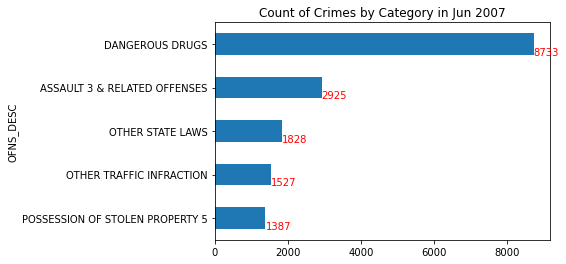

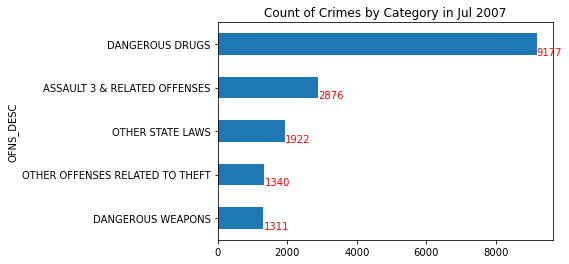

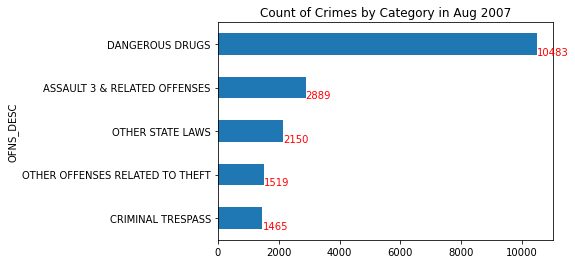

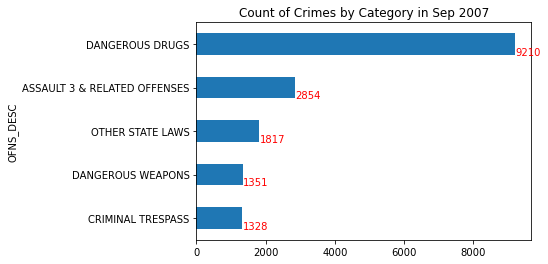

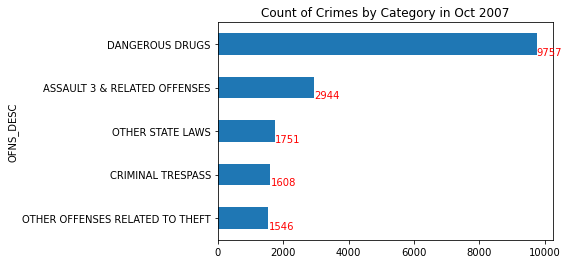

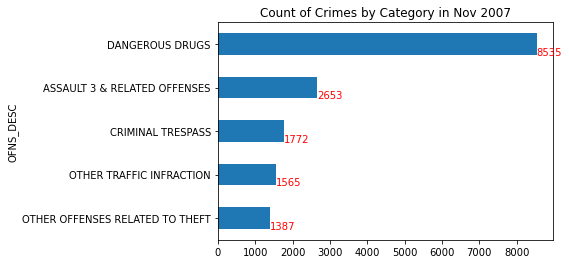

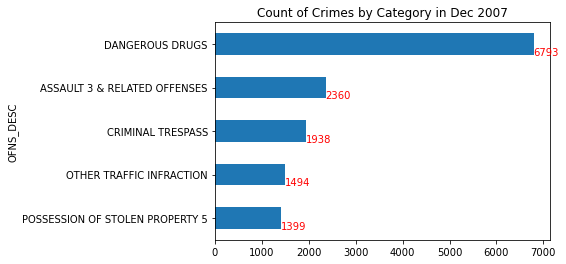

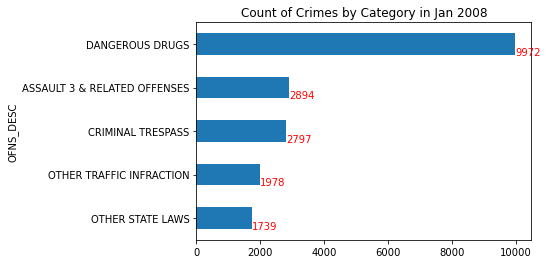

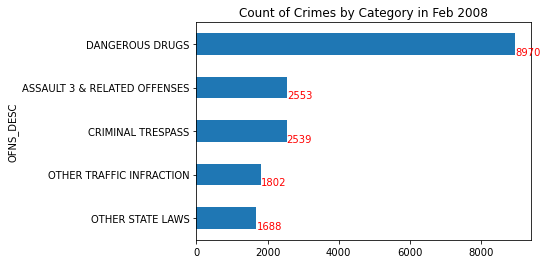

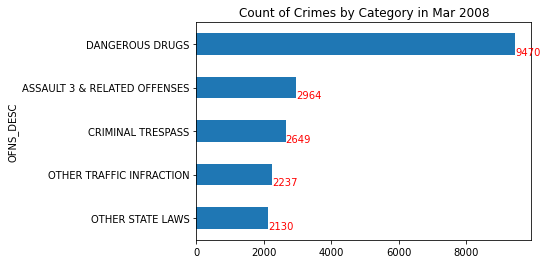

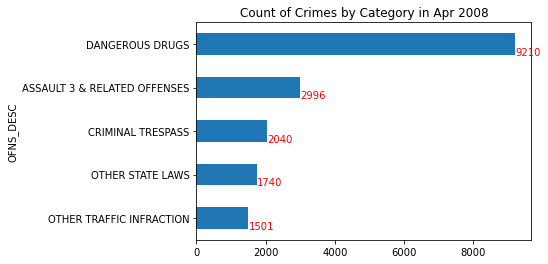

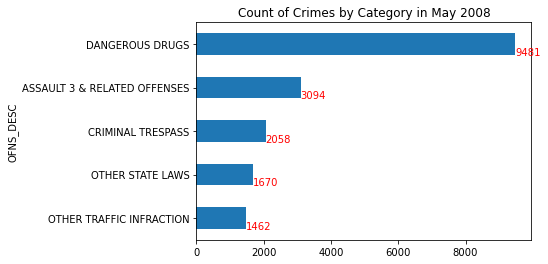

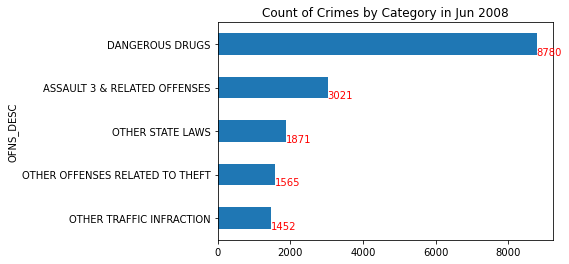

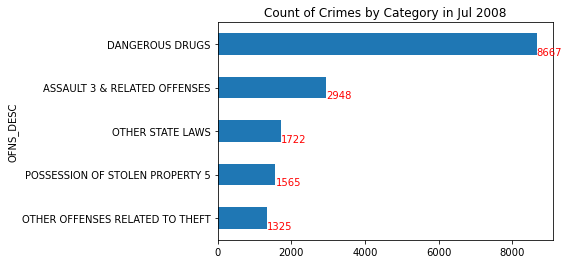

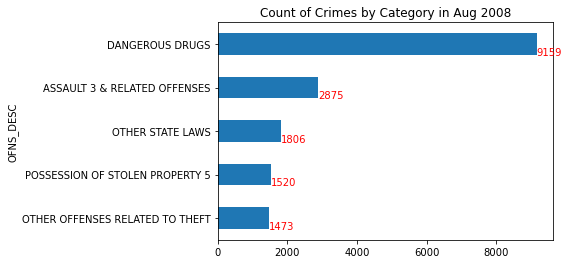

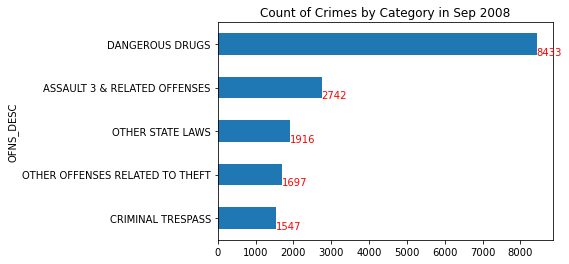

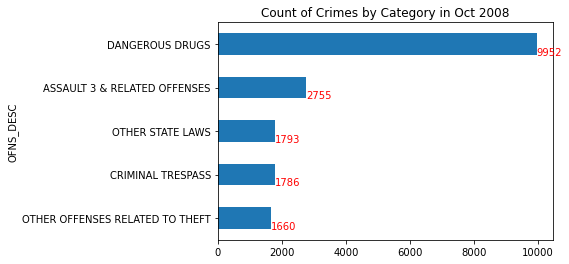

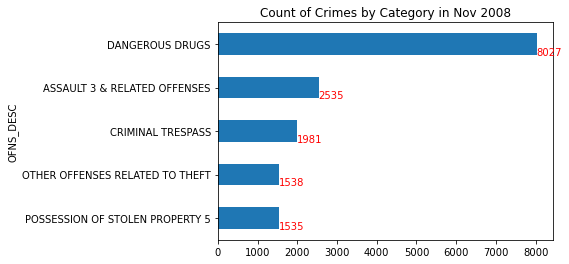

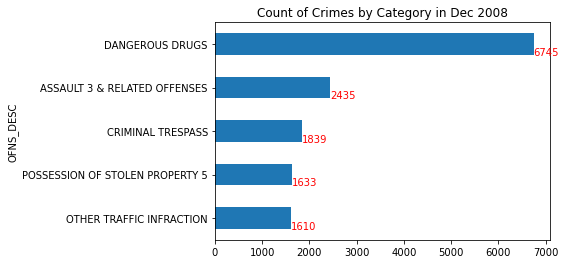

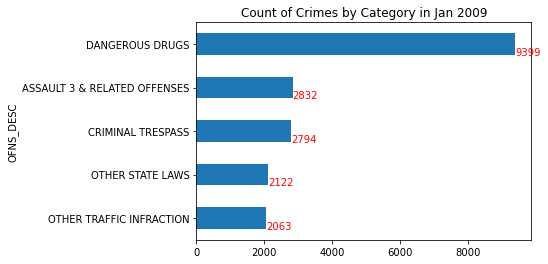

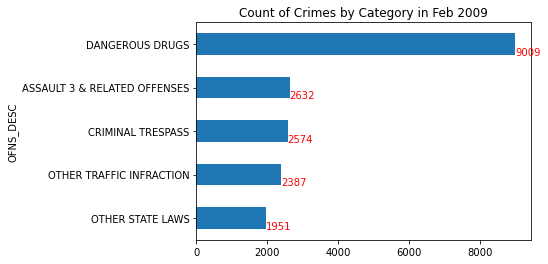

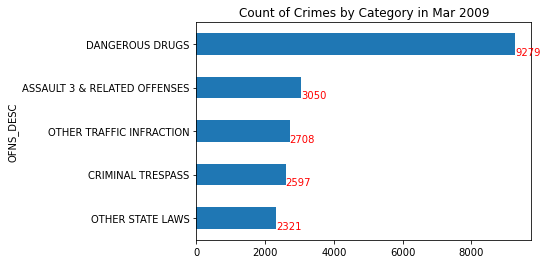

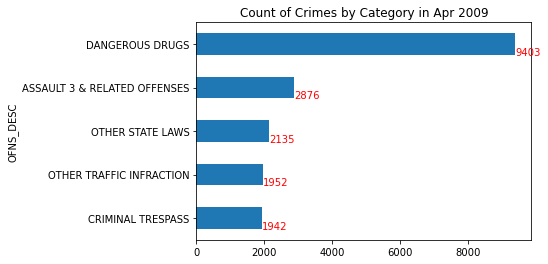

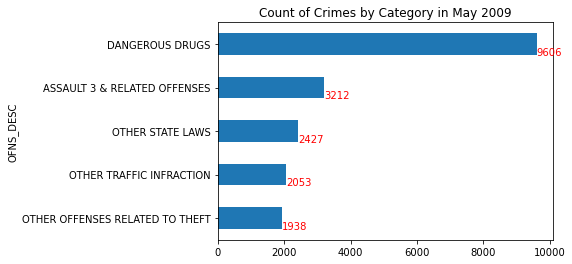

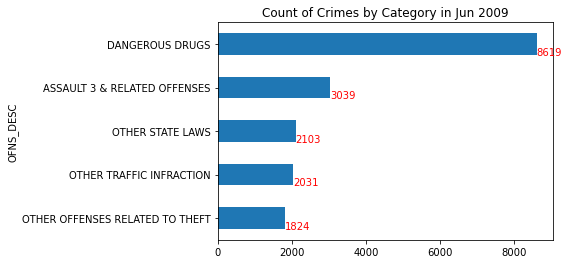

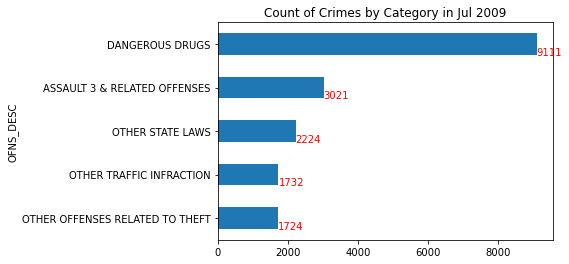

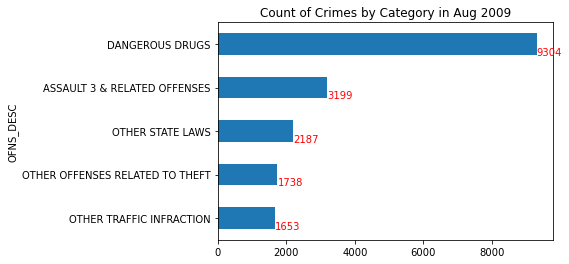

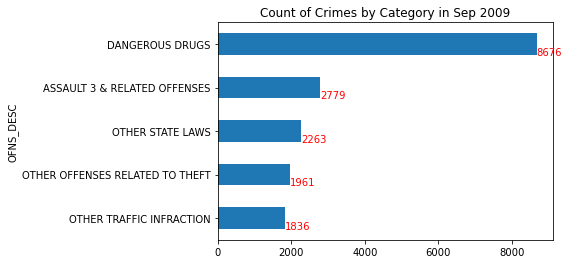

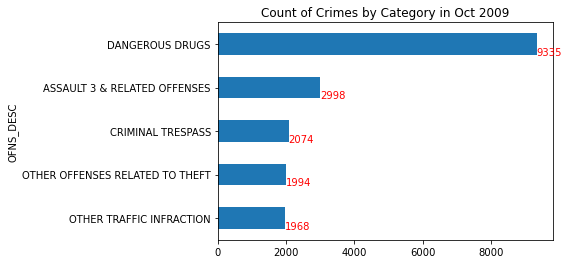

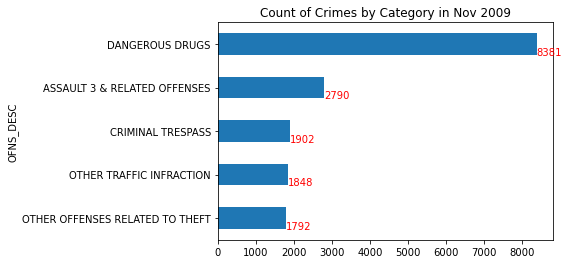

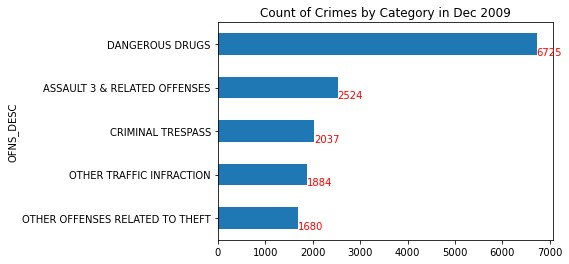

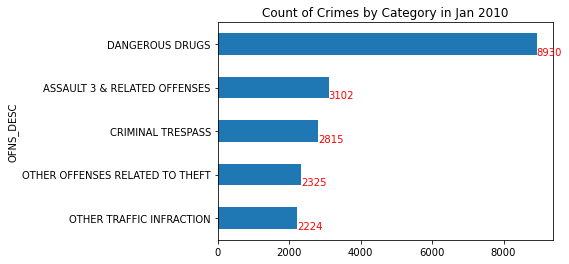

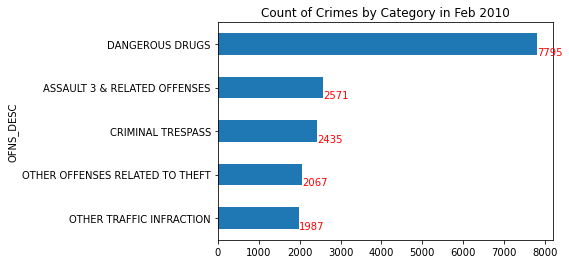

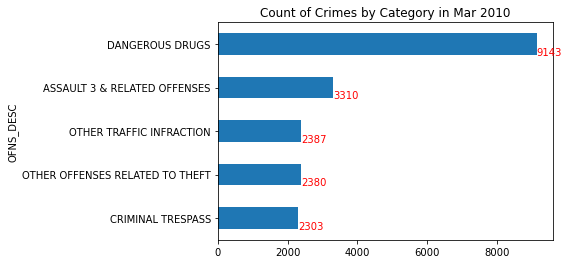

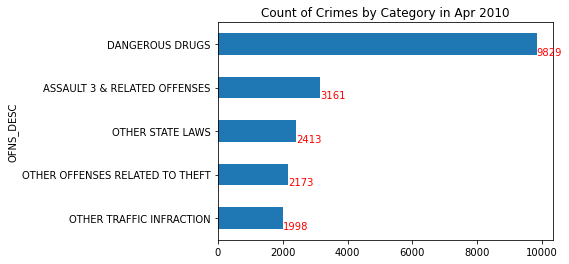

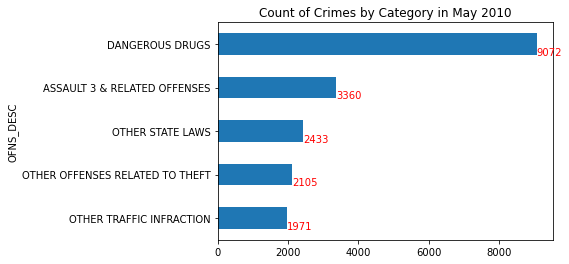

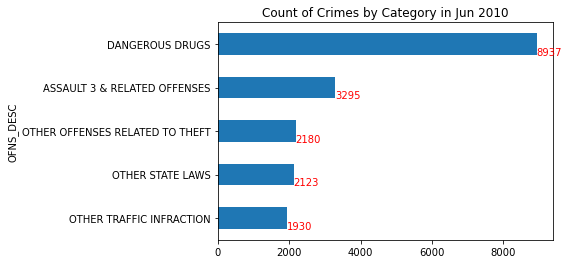

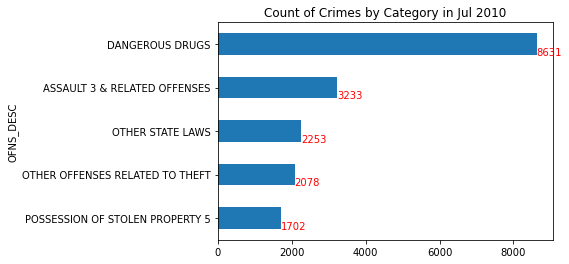

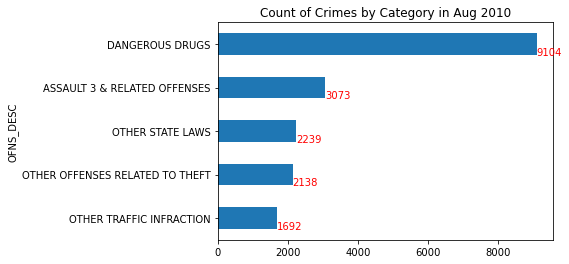

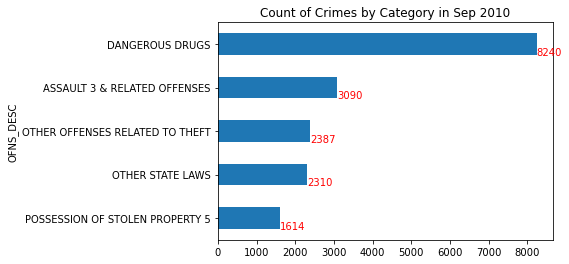

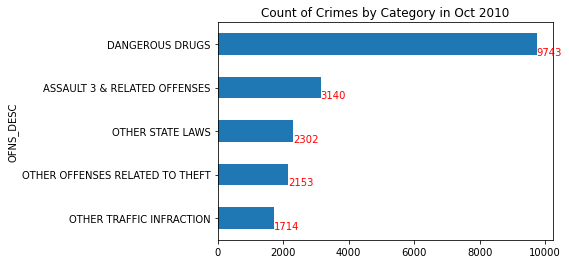

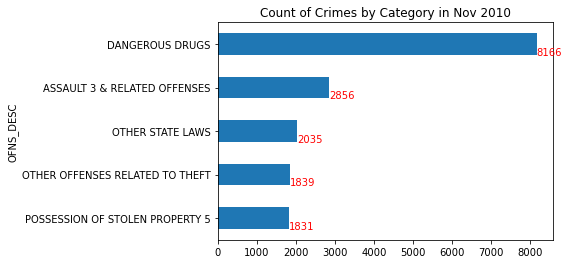

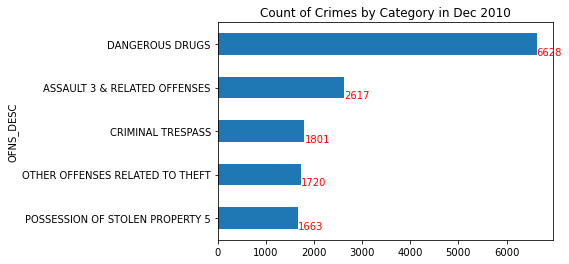

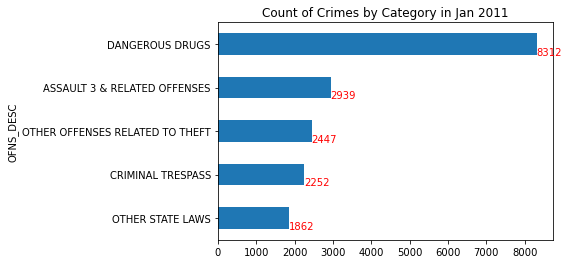

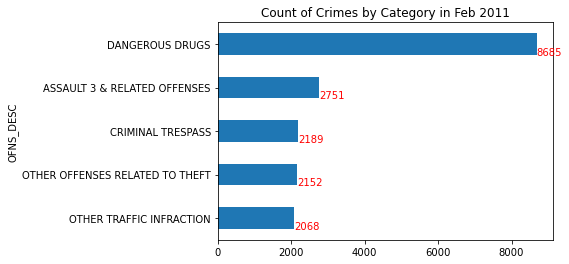

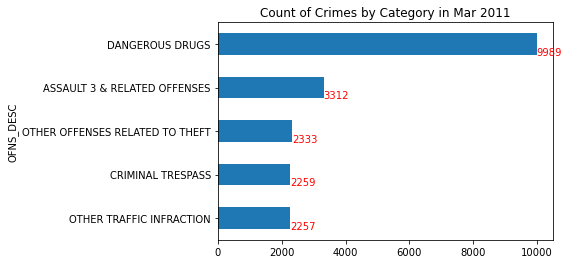

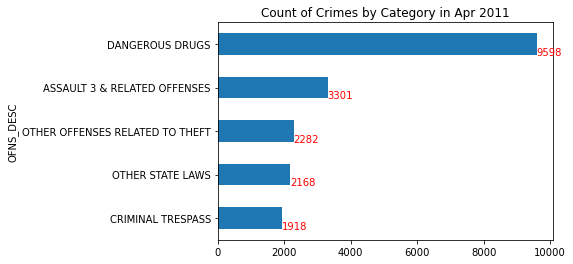

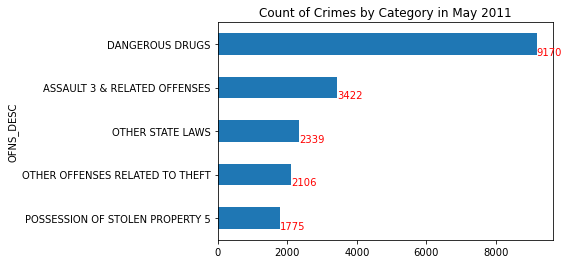

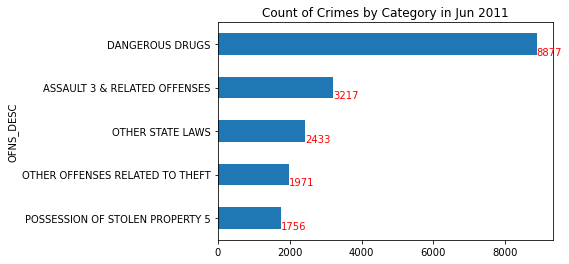

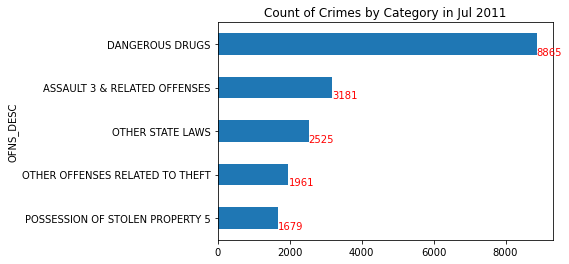

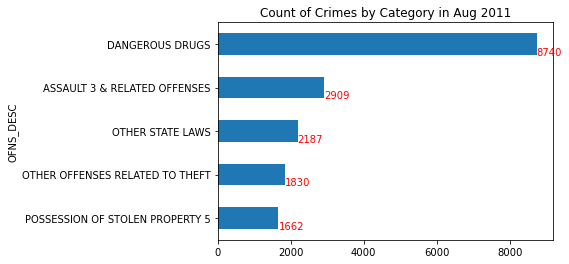

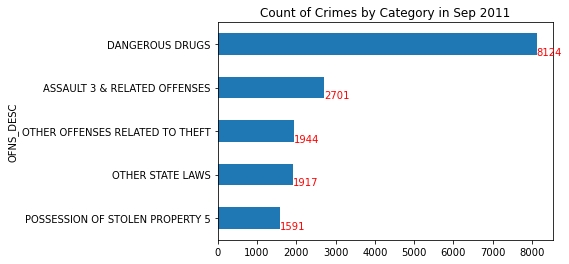

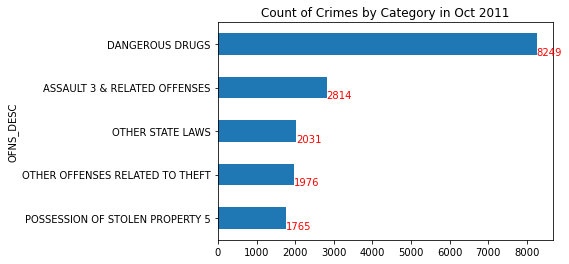

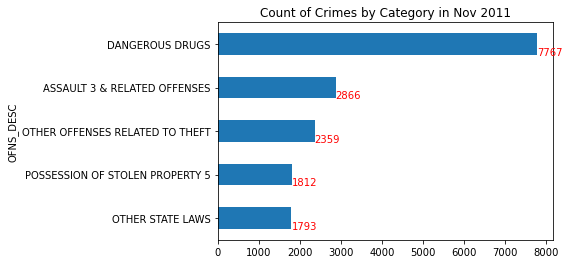

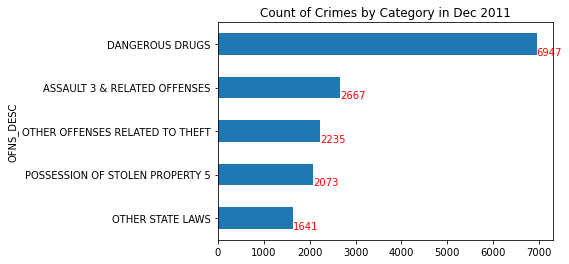

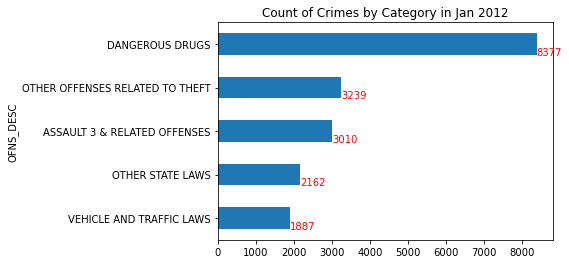

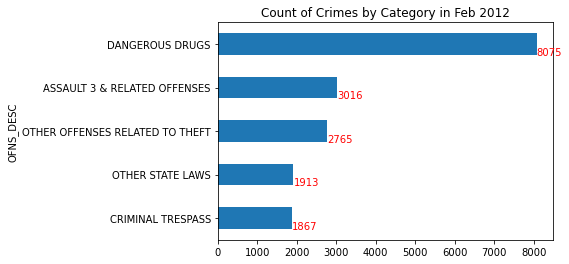

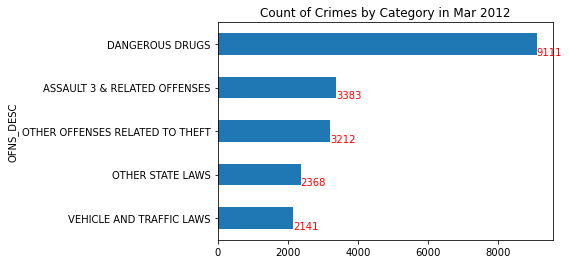

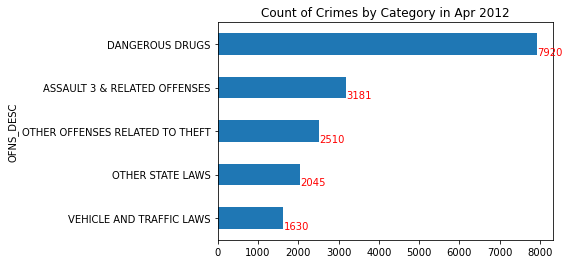

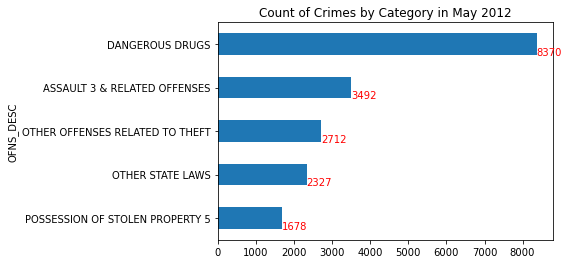

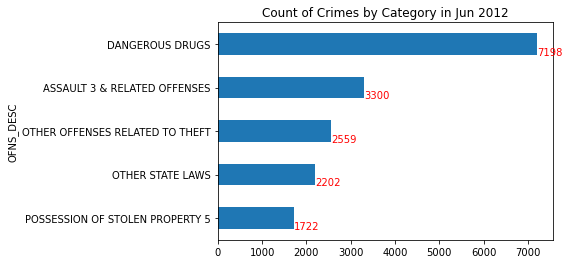

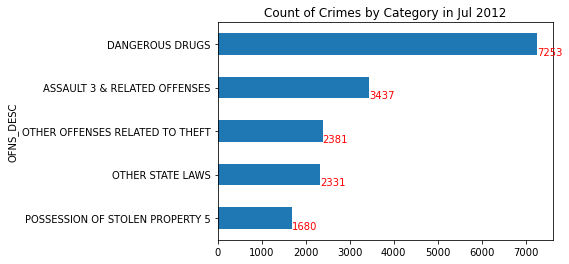

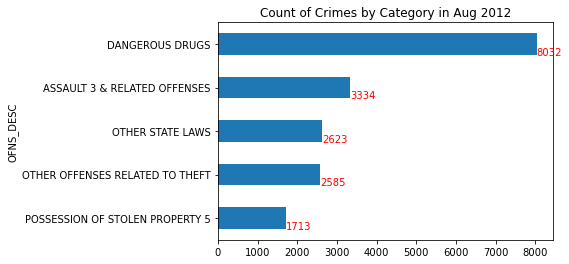

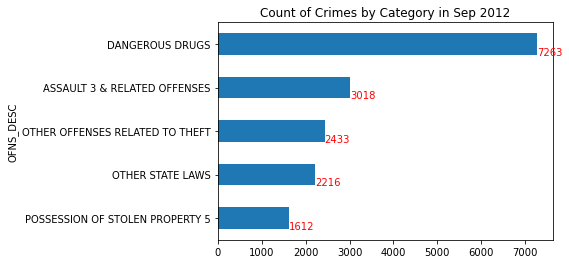

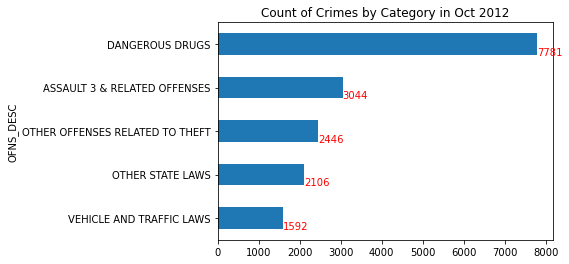

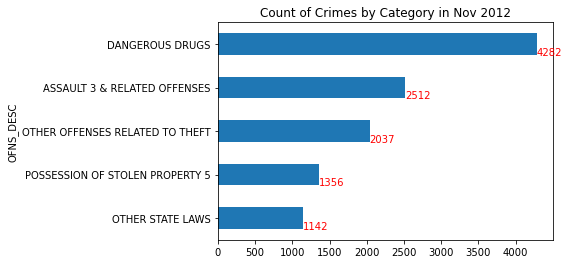

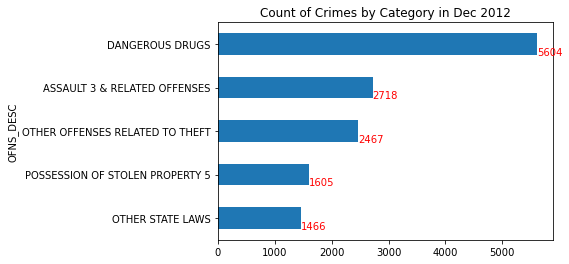

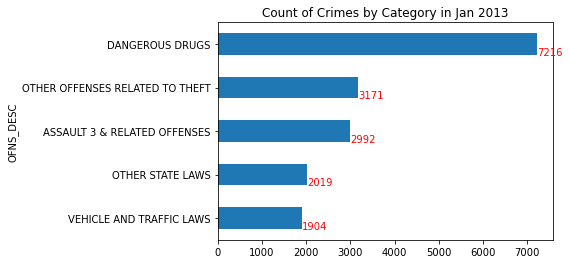

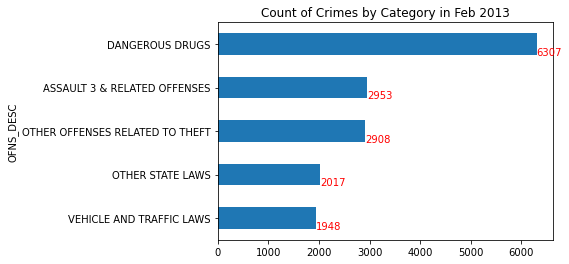

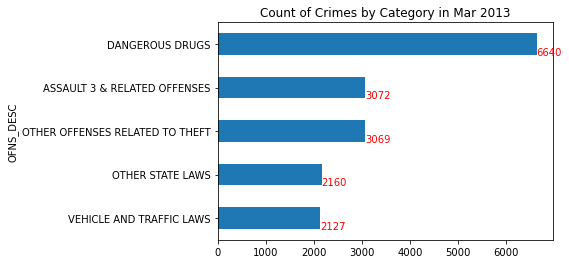

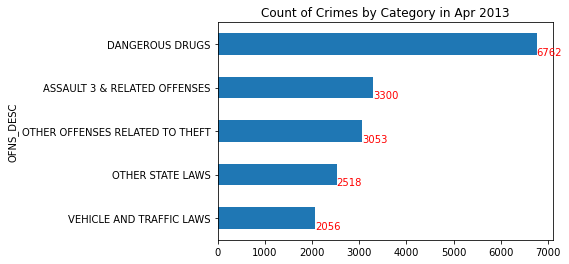

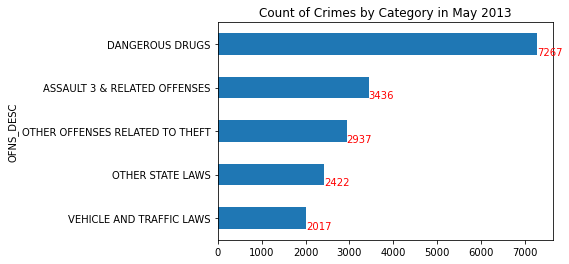

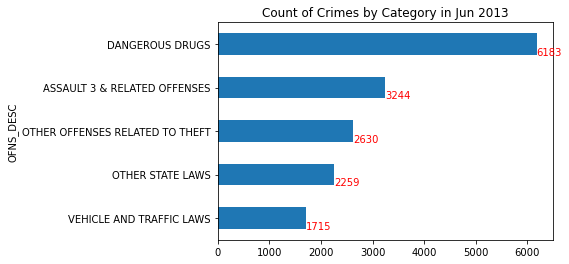

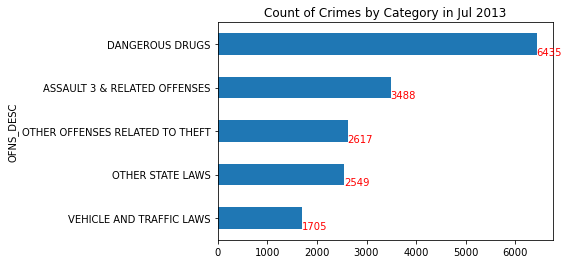

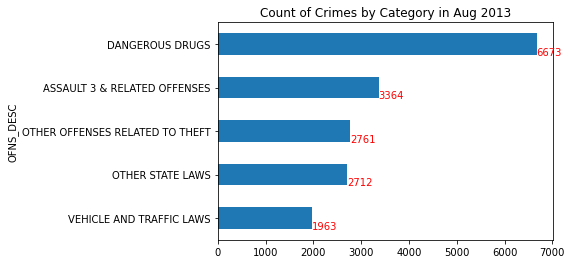

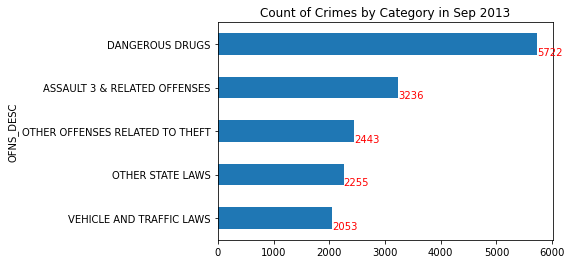

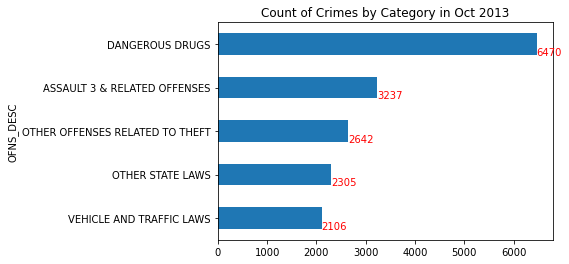

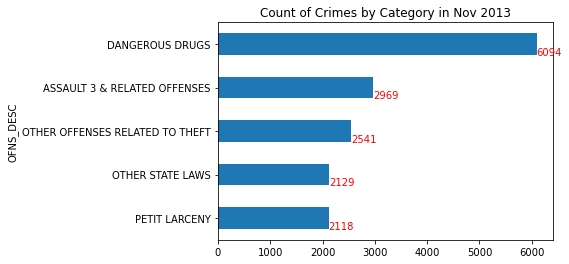

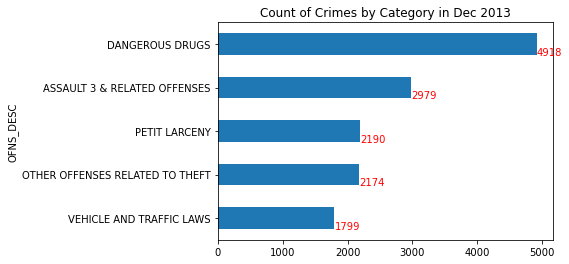

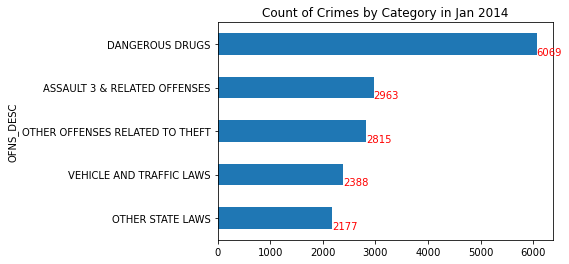

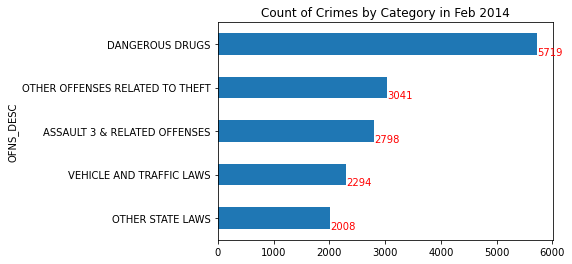

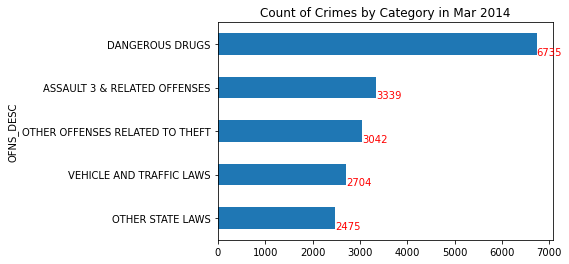

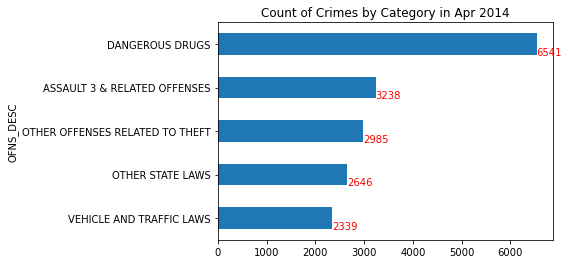

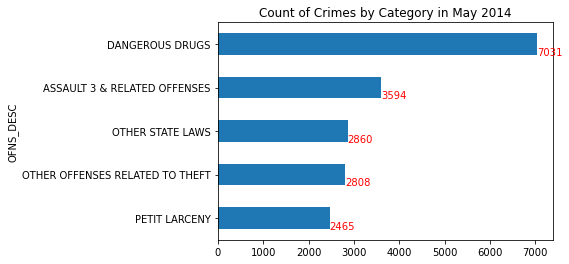

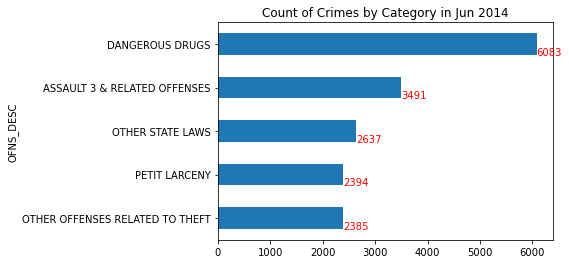

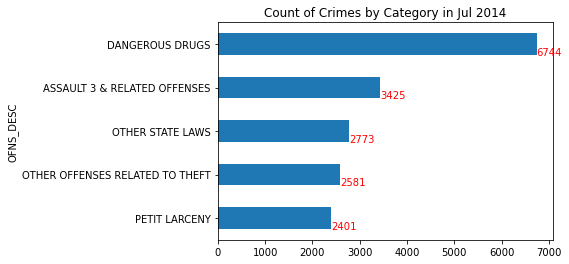

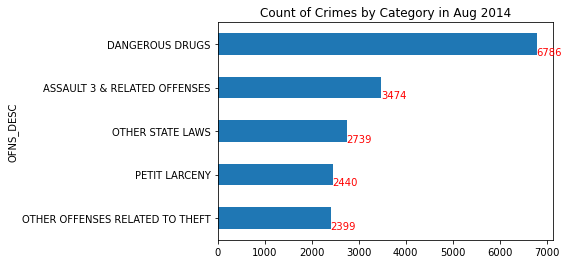

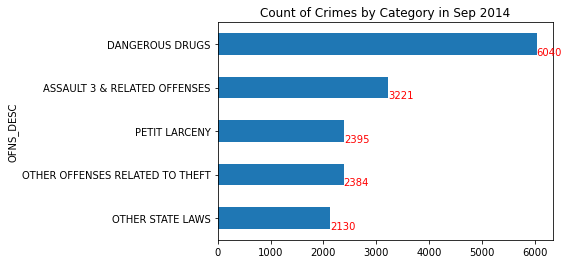

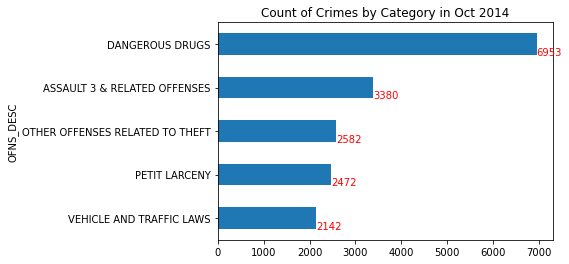

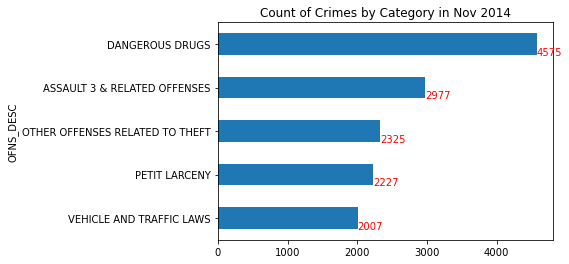

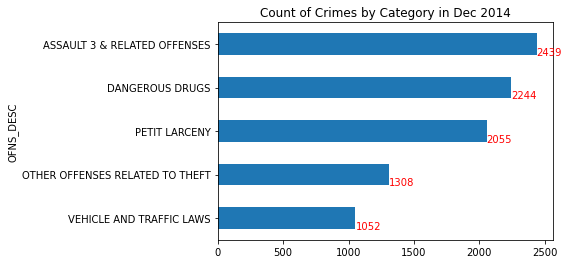

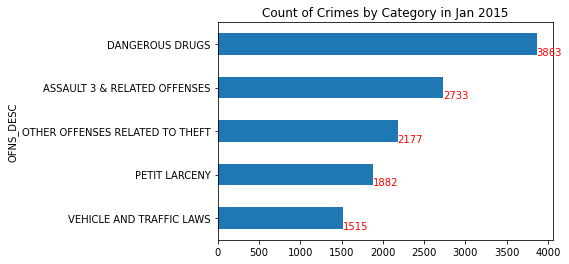

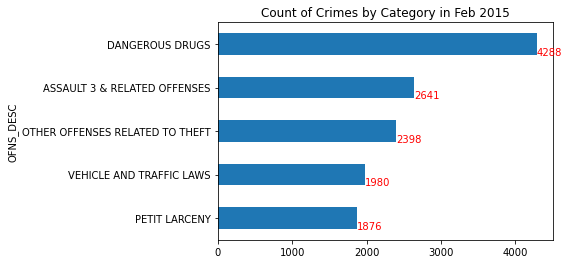

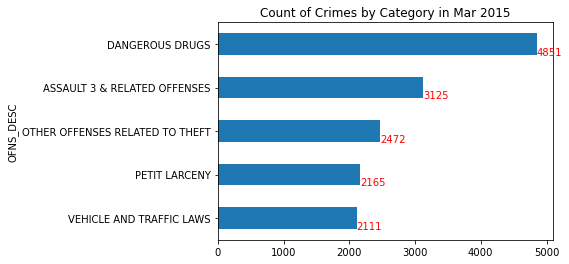

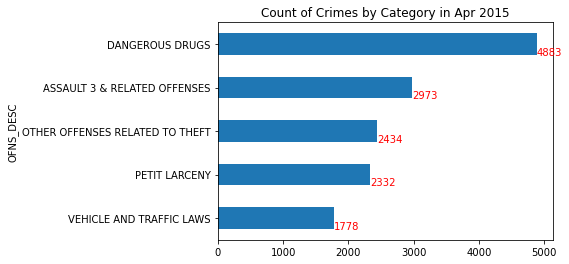

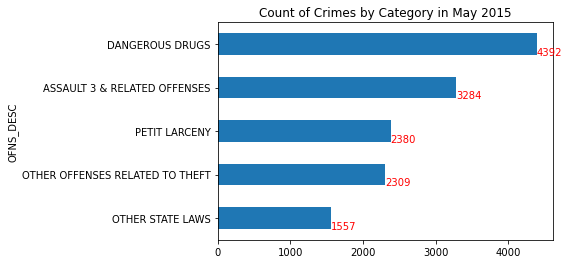

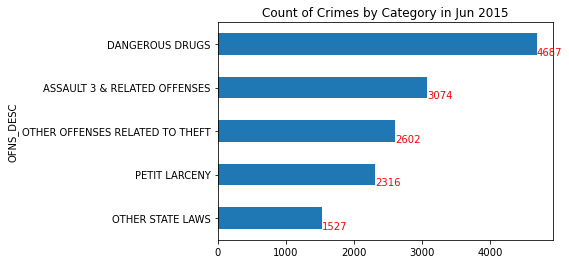

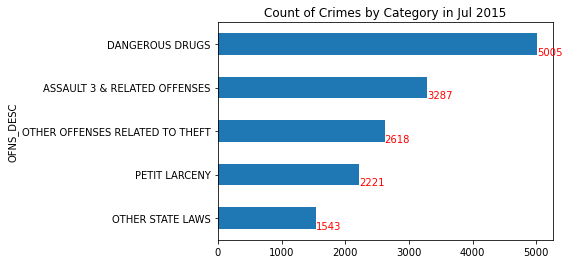

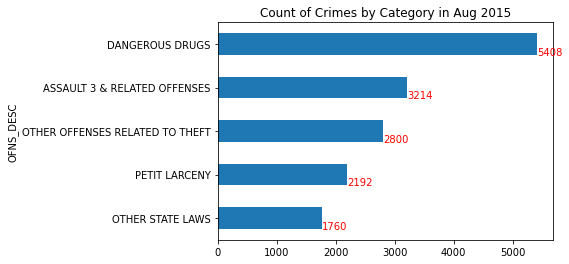

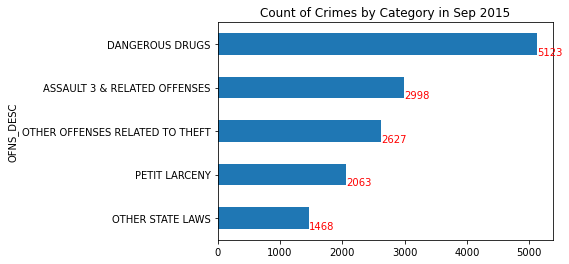

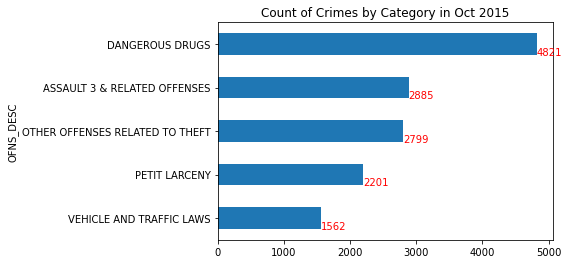

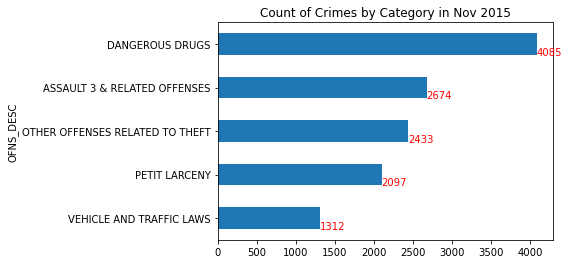

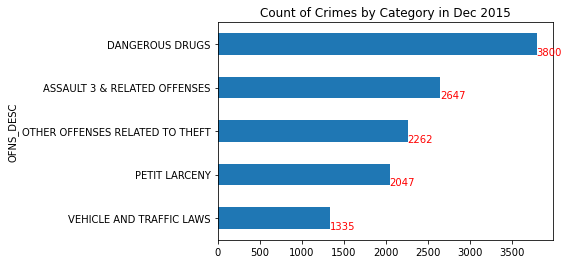

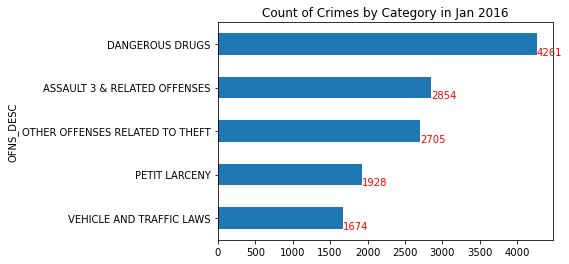

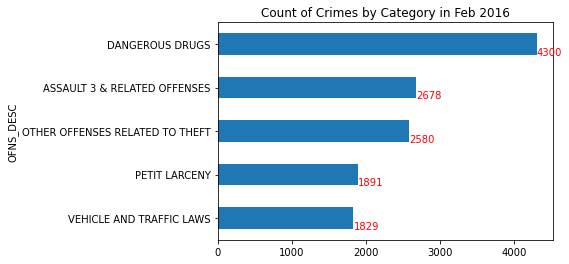

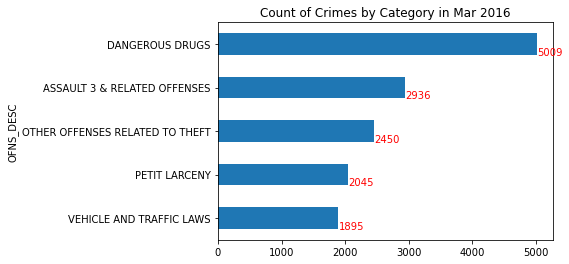

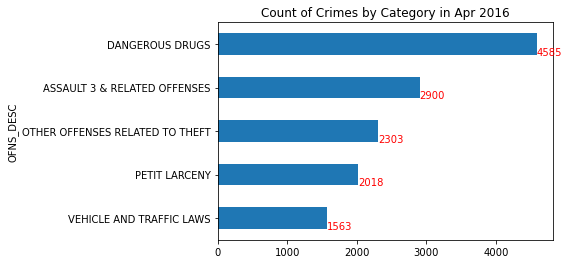

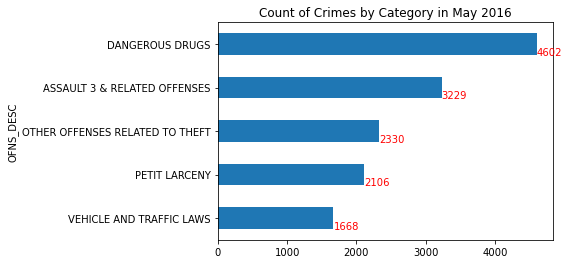

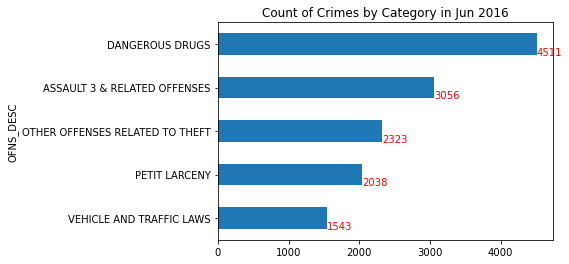

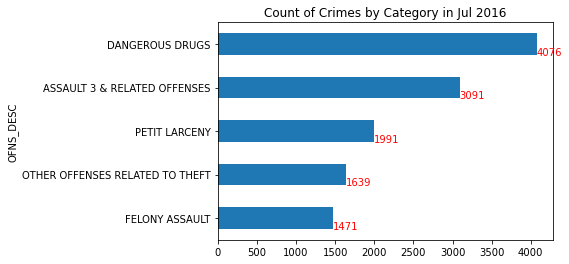

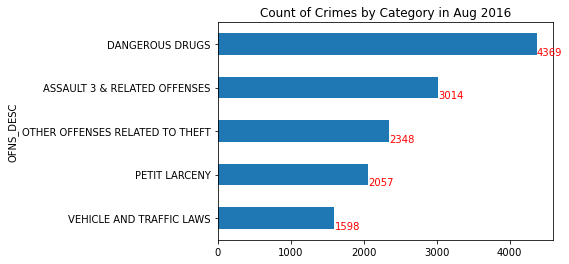

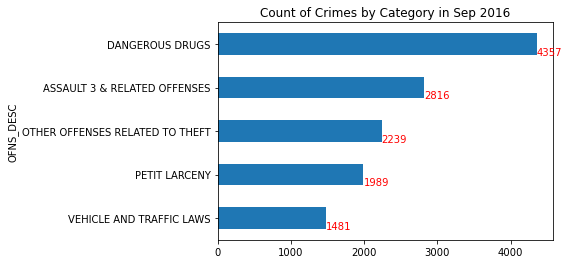

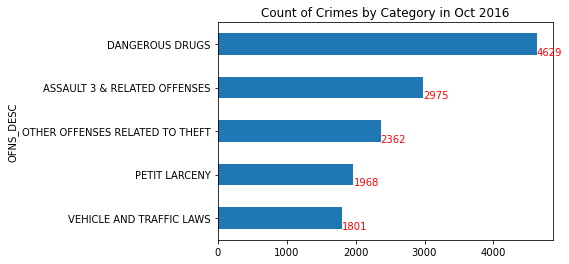

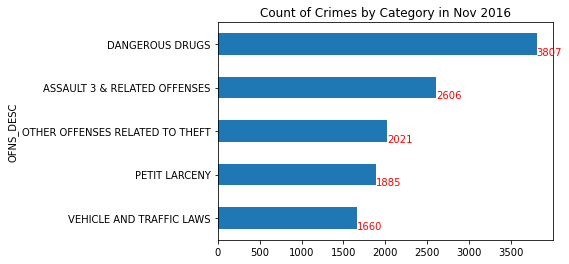

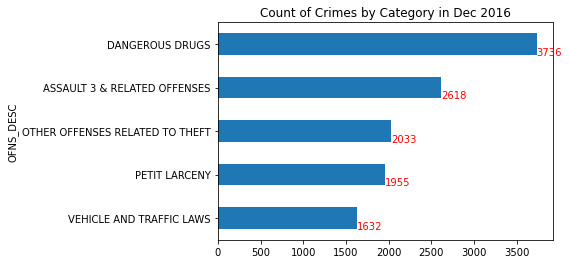

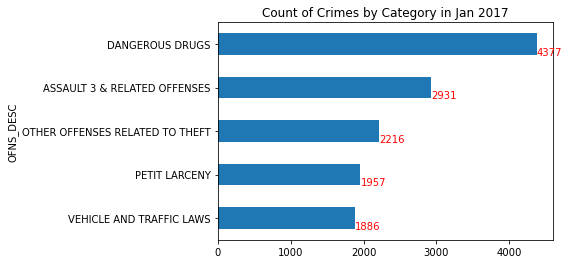

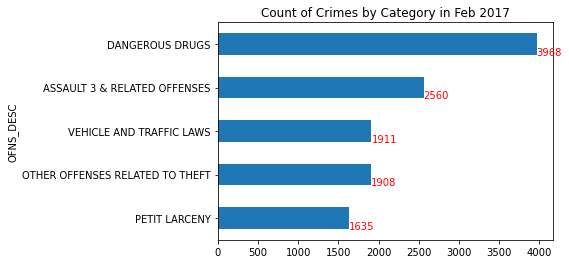

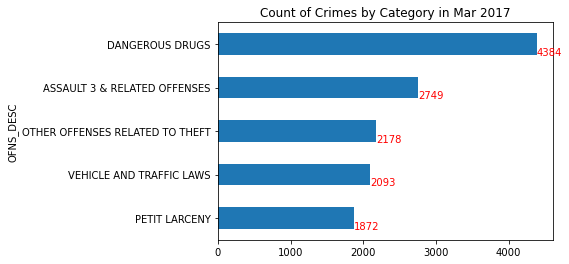

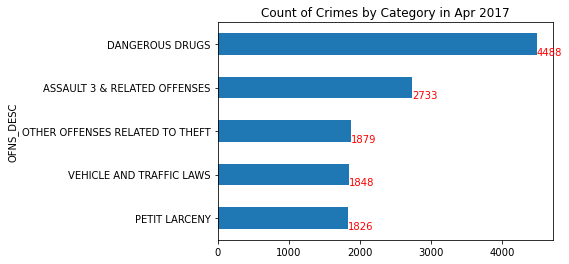

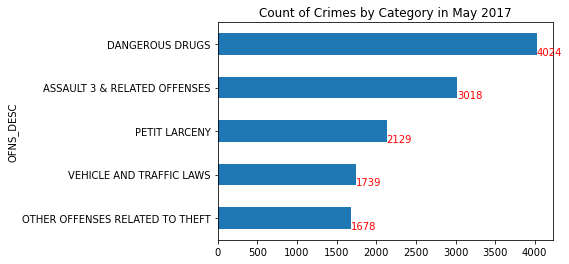

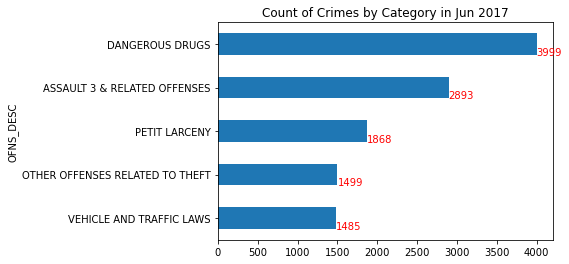

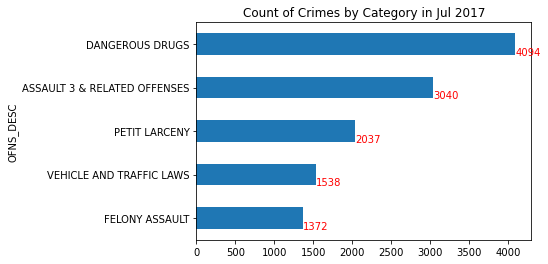

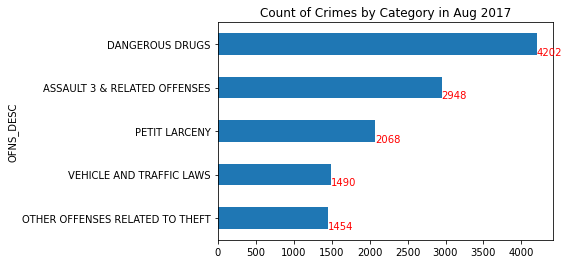

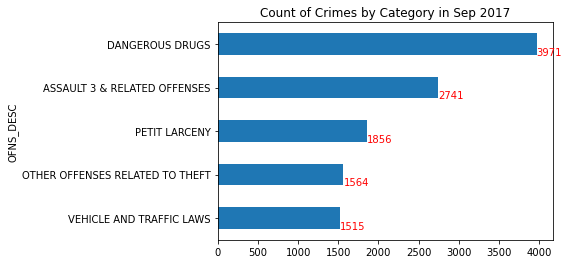

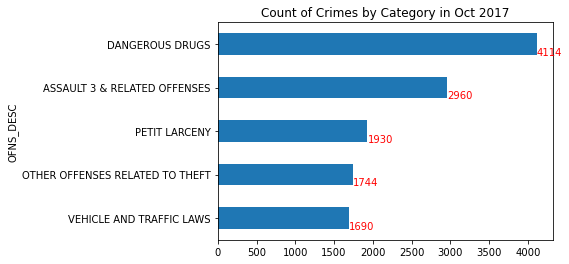

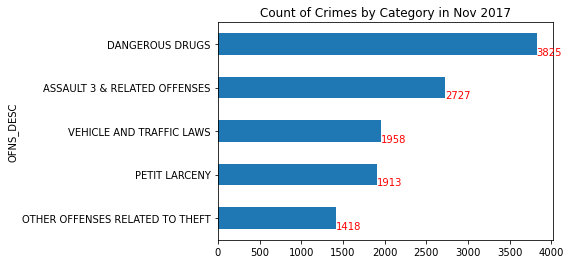

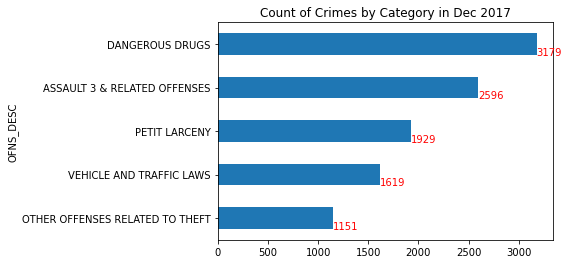

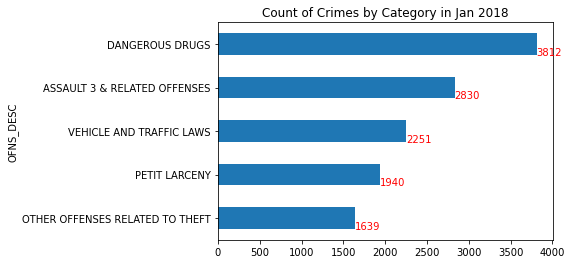

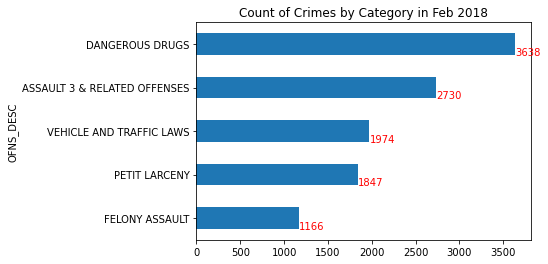

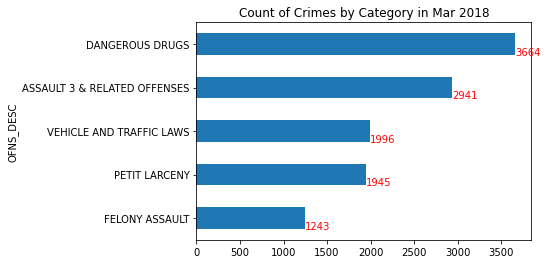

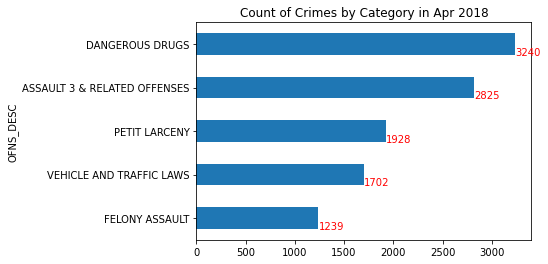

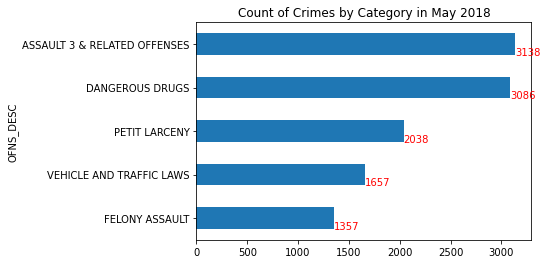

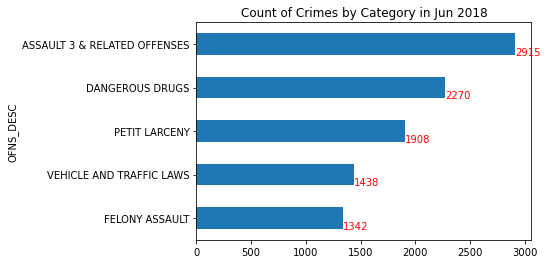

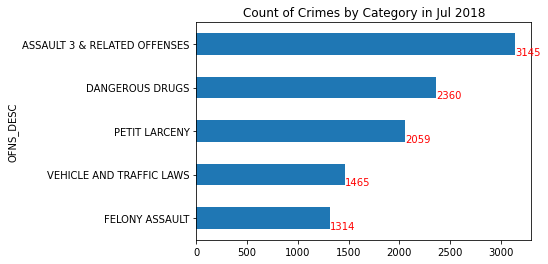

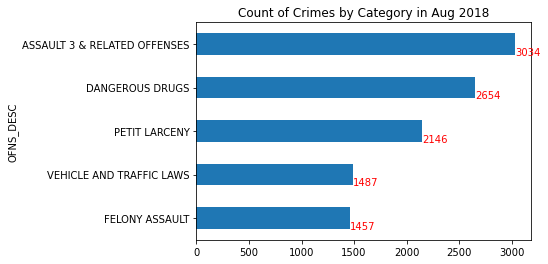

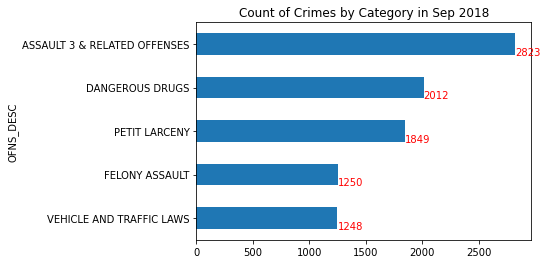

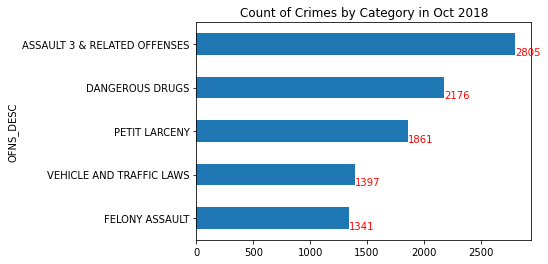

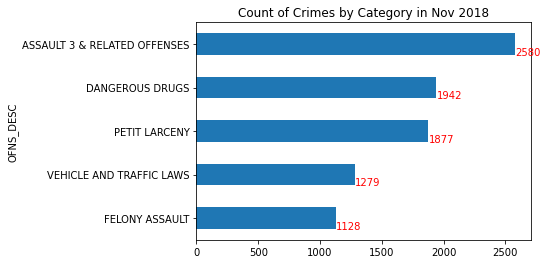

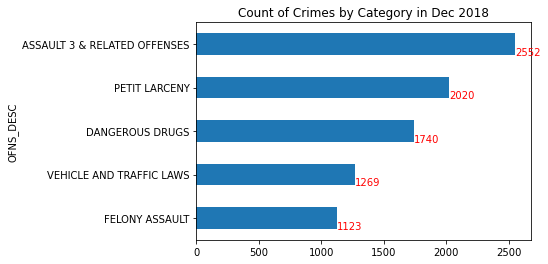

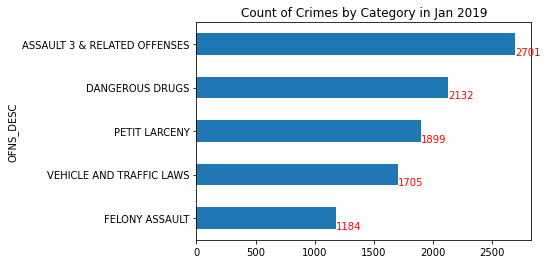

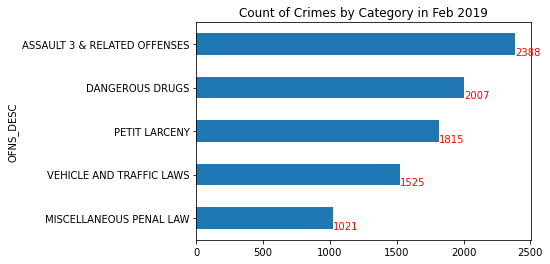

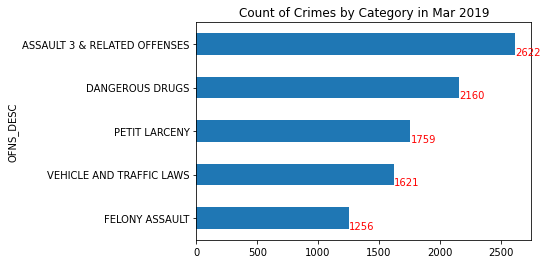

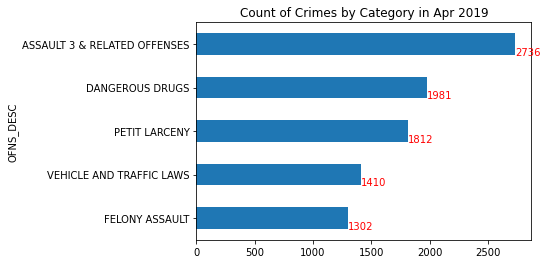

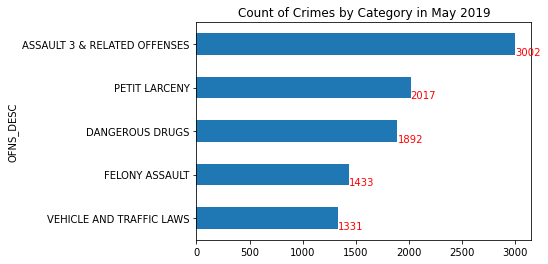

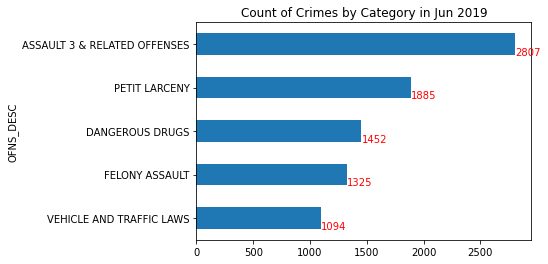

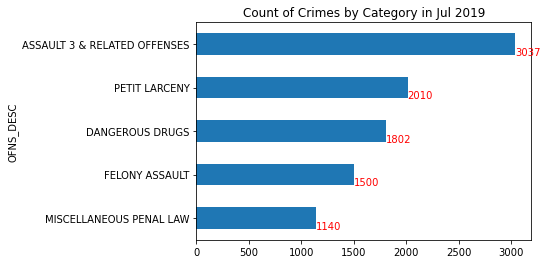

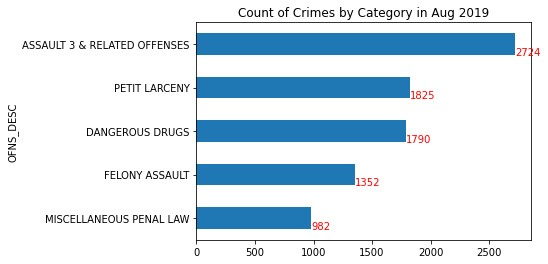

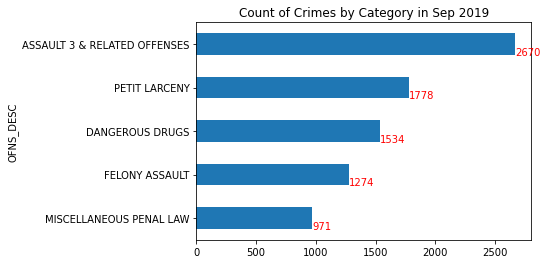

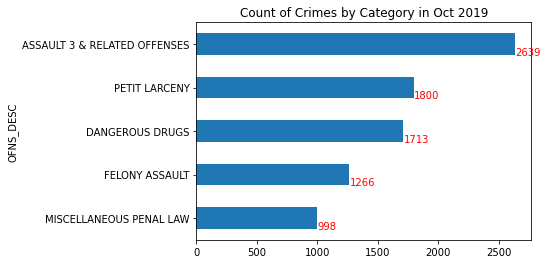

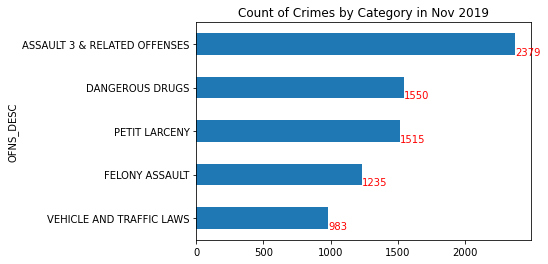

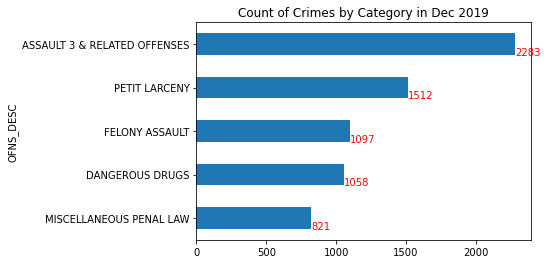

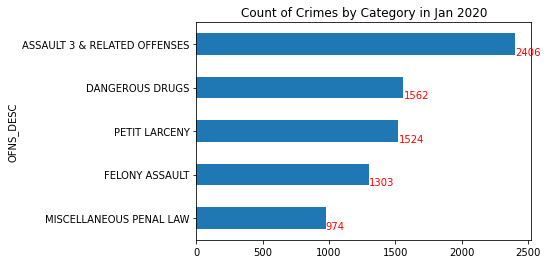

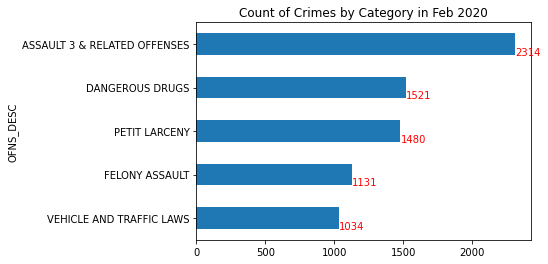

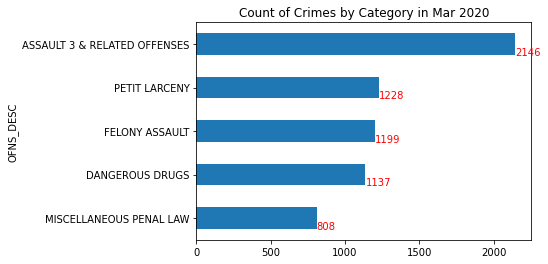

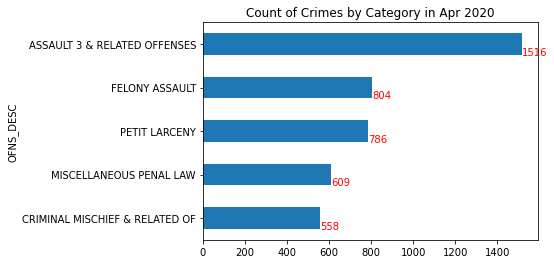

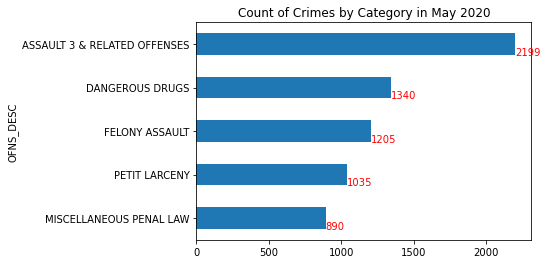

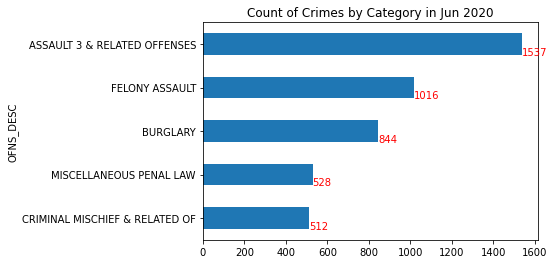

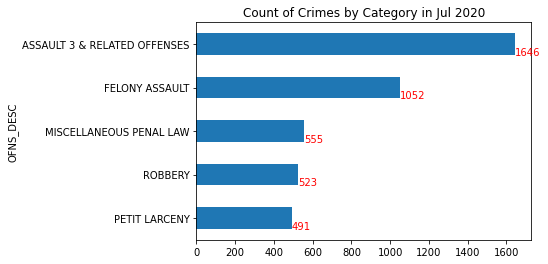

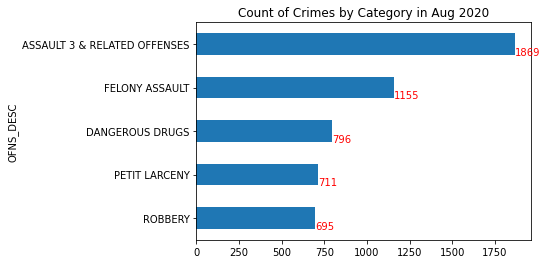

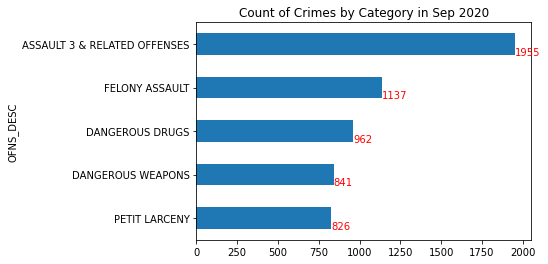

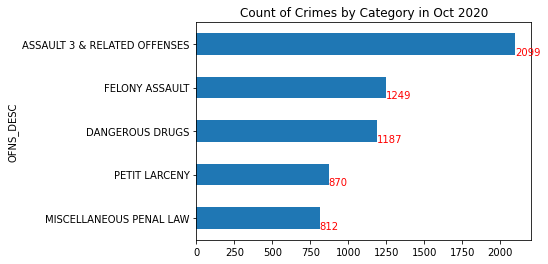

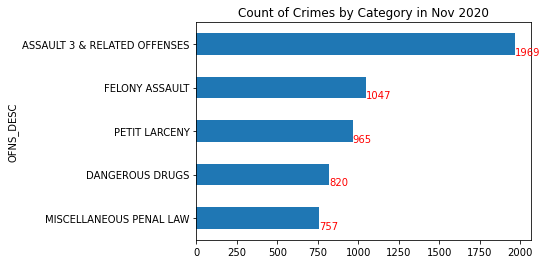

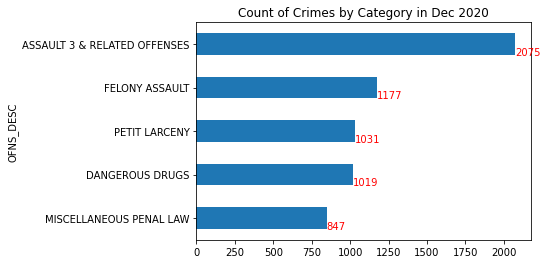

In [319]:
dct = {}
months = ["", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in range(2006, 2021):
    yr = df_years[year]
    # print(yr.head())
    yr = yr.sort_values("ARREST_DATE")
    #lst = []
    for month in range(1, 13):
        temp = yr.groupby([yr["ARREST_DATE"].dt.month.rename("MONTH") == month, yr["OFNS_DESC"]] )["OFNS_DESC"].count().sort_values(ascending = False)

        for i in temp:
            if i == True:
                top5 = temp[i][:5][::-1]
                # dictionary by tuple of month and year of the top 5 type of crimes per month for every year
                dct[(month, year)] = top5
                model = top5.plot(kind = "barh", title = f"Count of Crimes by Category in {months[month]} {str(year)}")
                for i, v in enumerate(top5):
                    model.text(v, i - 0.25, str(v), color = "red")
                plt.show()
                break   


In [320]:
# Dictionary consists of the same top two type of crimes from Jan 2006 to November 2018 
# --> Dangerous Drugs and Assualt 3 & Related Offenses
# From December 2019 and throughout 2020, top two were Assault 3 & Related Offenses and Petit Larceny
# -------------> 
# shows that the type of crime is not seasonal
print(dct)

{(1, 2006): OFNS_DESC
OTHER STATE LAWS                1260
OTHER TRAFFIC INFRACTION        1923
CRIMINAL TRESPASS               1993
ASSAULT 3 & RELATED OFFENSES    2560
DANGEROUS DRUGS                 7789
Name: OFNS_DESC, dtype: int64, (2, 2006): OFNS_DESC
OTHER OFFENSES RELATED TO THEFT    1332
OTHER TRAFFIC INFRACTION           2082
CRIMINAL TRESPASS                  2108
ASSAULT 3 & RELATED OFFENSES       2360
DANGEROUS DRUGS                    7288
Name: OFNS_DESC, dtype: int64, (3, 2006): OFNS_DESC
OTHER OFFENSES RELATED TO THEFT    1478
CRIMINAL TRESPASS                  2254
OTHER TRAFFIC INFRACTION           2553
ASSAULT 3 & RELATED OFFENSES       2907
DANGEROUS DRUGS                    8293
Name: OFNS_DESC, dtype: int64, (4, 2006): OFNS_DESC
OTHER STATE LAWS                1188
CRIMINAL TRESPASS               1513
OTHER TRAFFIC INFRACTION        1985
ASSAULT 3 & RELATED OFFENSES    2745
DANGEROUS DRUGS                 8114
Name: OFNS_DESC, dtype: int64, (5, 2006): OFNS_DESC
